# Text To Speech Synthesis using Machine Learning

## <i>Part A - Application Area Review</i>

### Overview

Speech synthesis is the process of generating speech by artificial means, usually by computer. It involves the production of sound to simulate human speech, which is referred to as low-level synthesis. High-level synthesis deals with the conversion of written text or symbols into an abstract representation of the desired acoustic signal, suitable for driving a low-level synthesis system. 

Text-to-speech (TTS) is a technology that converts written text into spoken words. It is a type of speech synthesis that uses deep learning models to generate human-like speech. TTS AI can be used in a variety of applications, including audiobooks, virtual assistants, and accessibility tools for people with visual impairments. These AI models are trained on large datasets of human speech, which allows them to learn the nuances of language and produce speech that is indistinguishable from human speech. They can also be customized to produce speech in different languages, accents, and styles.

<b><u>Literature Review</u></b>

The history of speech synthesis possibly dates back to the 12th century when people tried to build machines to synthesize human speech however, the first computer-based speech synthesis system was developed in the latter half of the 20th century. Early computer-based speech synthesis methods predominantly used articulatory approaches, formant synthesis, and concatenative synthesis. Since the 2010s, neural network-based speech synthesis has become the industry standard to achieving speech synthesis indistinguishable from real human voices (Tan et al., 2021). 

<b><i>Neural Speech Synthesis</b></i>

The first neural tts model was proposed by Google's Deepmind (Oord et al., 2016). A modern tts model genrally consists of a few critical components starting with a text analysis process which converts written text into a series of linguistic features. An acoustic model then creates acoustic features based on the aforemention linguistic features. A vocoder then converts these acoustic features into waveforms (Kaur and Singh, 2022). A vocoder, short for voice encoder, is a crucial component responsible for converting linguistic features into a natural-sounding speech waveform. The term "vocoder" is often used broadly to refer to any system or algorithm that performs this transformation, and there are different types of vocoders with varying architectures. This review will be discussing three main approaches based on the types of vocoders used in neural tts.

<b><i>Autoregressive Vocoders (MEL Inverters)</b></i>

Auto-regressive vocoders are a type of vocoder used in text-to-speech (TTS) systems. Vocoder stands for "voice encoder" and is a crucial component in the process of converting text into speech. The main goal of a vocoder is to generate a natural-sounding and high-quality speech signal. In the context of auto-regressive vocoders, the term "auto-regressive" refers to the way the model generates the output waveform. These models predict one audio sample at a time based on the previous samples in a sequential manner. This sequential generation allows the model to capture dependencies and patterns in the audio waveform, leading to more natural-sounding speech. This is in contrast to non-auto-regressive models, where all samples are generated simultaneously and independently.

One popular example of an auto-regressive vocoder is WaveNet (Oord et al., 2016), developed by DeepMind, WaveNet is a generative model for raw audio waveforms and uses dilated convolutions to capture long-range dependencies in the data. It has been used in various text-to-speech applications to generate high-quality and natural-sounding speech.

<b><i>GAN Based Vocoders</b></i>

A GAN is a type of generative model consisting of a generator and a discriminator, which are trained simultaneously through adversarial training. The generator aims to create realistic data, while the discriminator tries to distinguish between real and generated data. This process leads to the generator improving its ability to generate more realistic samples. GAN-based vocoders are able to generate high-quality speech from text inputs.

Wave GAN proposed by Donahue, McAuley and Puckette is arguably the first attempt to solve the problem using GANs (Donahue, McAuley and Puckette, 2019).

<b><i>Flow Based Vocoders</b></i>

Flow-based vocoders are a type of vocoder used in text-to-speech (TTS) systems. They are part of a family of generative models called normalizing flow models. Normalizing flows are a class of generative models that learn to transform a simple probability distribution (e.g., Gaussian distribution) into a more complex distribution that matches the data distribution. In the context of audio generation, these models can be used to learn the complex mapping from a simple distribution to the distribution of audio samples. Flow-based models consist of a series of invertible transformations. These transformations are designed so that both the forward (sampling) and inverse (probability density estimation) processes are computationally tractable. 

One of the advantages of flow-based vocoders is that they can generate audio samples in parallel, making them more computationally efficient compared to auto-regressive models. Other advantages include efficient training and high-quality audio synthesis. Flow-based vocoders take as input the learned representation of the speech signal and generate the corresponding waveform in parallel

An earlier example of a flow-based vocoder is the WaveGlow model (Prenger et al., 2018), which was introduced by NVIDIA. WaveGlow employs normalizing flows to model the conditional distribution of audio waveforms given linguistic features and other relevant information. 

<b><u>Implementation</u></b>

For this implementation, Glow TTS (Kim et al., 2020) will be used through the api provided by the corqui.ai library

<b><i>HLD</b></i>

![TTS-HLD](TTS-HLD.png)

<b><i>Dataset</b></i>

The data requirements for the model calls for transcribed speech which have been divided into the audio files and its subsequent transcription. The audio files need to be in the .wav format as this is a lossless audio format which is required to prevent compression artifacts.

For this use case the LJ Speech dataset will be used (Ito and Johnson, 2017). The raw format of the dataset is explained in the documentation for this dataset.

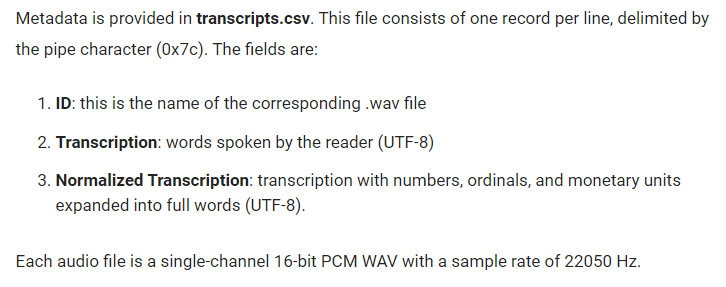

By default the wav files are presented under a folder a such:

<i><b>/wavs<br>
 | - audio1.wav<br>
 | - audio2.wav<br>
 | - audio3.wav</i><b>

The required folder structure for the coqui api is as follows:

<i><b>"/Dataset"<br>
    |<br>
    | -> metadata.csv<br>
    | -> /wavs<br>
        | -> audio1.wav<br>
        | -> audio2.wav<br>
        | ...</i></b>

The final formatting and processing is shown further in the implementation below. 

In [ ]:
# Clone coqui for implementation
!git clone "https://github.com/coqui-ai/TTS"

In [ ]:
# Open repo and install dependencies
%cd TTS
!pip install -r requirements.txt

In [11]:
# Install coqui tts
!python setup.py install 

running install
running bdist_egg
running egg_info
writing TTS.egg-info\PKG-INFO
writing dependency_links to TTS.egg-info\dependency_links.txt
writing entry points to TTS.egg-info\entry_points.txt
writing requirements to TTS.egg-info\requires.txt
writing top-level names to TTS.egg-info\top_level.txt
reading manifest file 'TTS.egg-info\SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE.txt'
writing manifest file 'TTS.egg-info\SOURCES.txt'
installing library code to build\bdist.win-amd64\egg
running install_lib
running build_py
running build_ext
building 'TTS.tts.utils.monotonic_align.core' extension
creating build
creating build\temp.win-amd64-cpython-310
creating build\temp.win-amd64-cpython-310\Release
creating build\temp.win-amd64-cpython-310\Release\TTS
creating build\temp.win-amd64-cpython-310\Release\TTS\tts
creating build\temp.win-amd64-cpython-310\Release\TTS\tts\utils
creating build\temp.win-amd64-cpython-310\Release\TTS\tts\utils\monotonic_align


c:\Users\glsup\AppData\Local\Programs\Python\Python310\lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
c:\Users\glsup\AppData\Local\Programs\Python\Python310\lib\site-packages\setuptools\command\easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
no previously-included directories found matching 'tests*'
c:\Users\glsup\AppData\Local\Programs\Python\Python310\lib\site-packages\setuptools\command\build_py.py:202: SetuptoolsDeprecationWarning:     Installing 'TTS.tts.utils.monotonic_align' as data is deprecated, please list it in `packages`.
    !!


    ############################
    # Package would be ignored #
    ############################
    Python recognizes 'TTS.tts.utils.monotonic_align' as an importable package,
    but it is not listed in t

Load Dataset

In [2]:
import os

from TTS.tts.configs.shared_configs import BaseDatasetConfig

output_path = "tts_train_dir"
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [ ]:
!pip install wget
# Downloading the LJSpeech Dataset.
import wget
wget.download("https://data.keithito.com/data/speech/LJSpeech-1.1.tar.bz2", out = output_path)

# Extract the Dataset (Extract manually using zip tool if not working on windows)
!tar -xf $output_path/LJSpeech-1.1.tar.bz2 -C $output_path

In [4]:
# Set dataset config
dataset_config = BaseDatasetConfig(
    formatter="ljspeech", meta_file_train="metadata.csv", path=os.path.join(output_path, "LJSpeech-1.1/")
)

Create model training config 

In [5]:
# Set config for glowtts
from TTS.tts.configs.glow_tts_config import GlowTTSConfig
config = GlowTTSConfig(
    batch_size=32,
    eval_batch_size=16,
    num_loader_workers=4,
    num_eval_loader_workers=4,
    run_eval=True,
    test_delay_epochs=-1,
    epochs=100,
    text_cleaner="phoneme_cleaners",
    use_phonemes=True,
    phoneme_language="en-us",
    phoneme_cache_path=os.path.join(output_path, "phoneme_cache"),
    print_step=25,
    print_eval=False,
    mixed_precision=True,
    output_path=output_path,
    datasets=[dataset_config],
    save_step=1000,
)

Initialize audio processor

In [6]:
from TTS.utils.audio import AudioProcessor
ap = AudioProcessor.init_from_config(config)

c:\Users\glsup\AppData\Local\Programs\Python\Python310\lib\site-packages\setuptools\version.py:1: UserWarning: Module TTS was already imported from c:\Users\glsup\AppData\Local\Programs\Python\Python310\lib\site-packages\tts-0.22.0-py3.10-win-amd64.egg\TTS\__init__.py, but c:\users\glsup\documents\iit\year 4\fyp\applied ai\tts is being added to sys.path
  import pkg_resources


 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log10
 | > min_level_db:-100
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:20
 | > fft_size:1024
 | > power:1.5
 | > preemphasis:0.0
 | > griffin_lim_iters:60
 | > signal_norm:True
 | > symmetric_norm:True
 | > mel_fmin:0
 | > mel_fmax:None
 | > pitch_fmin:1.0
 | > pitch_fmax:640.0
 | > spec_gain:20.0
 | > stft_pad_mode:reflect
 | > max_norm:4.0
 | > clip_norm:True
 | > do_trim_silence:True
 | > trim_db:45
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:10
 | > hop_length:256
 | > win_length:1024


Initialize the tokenizer

In [7]:
from TTS.tts.utils.text.tokenizer import TTSTokenizer
tokenizer, config = TTSTokenizer.init_from_config(config)

Load data samples

In [8]:
from TTS.tts.datasets import load_tts_samples
train_samples, eval_samples = load_tts_samples(
    dataset_config,
    eval_split=True,
    eval_split_max_size=config.eval_split_max_size,
    eval_split_size=config.eval_split_size,
)

 | > Found 13100 files in C:\Users\glsup\Documents\IIT\Year 4\FYP\Applied AI\TTS\tts_train_dir\LJSpeech-1.1


Initialize the model

In [9]:
from TTS.tts.models.glow_tts import GlowTTS
model = GlowTTS(config, ap, tokenizer, speaker_manager=None)

In [10]:
from trainer import Trainer, TrainerArgs
trainer = Trainer(
    TrainerArgs(), config, output_path, model=model, train_samples=train_samples, eval_samples=eval_samples
)

 > Training Environment:
 | > Backend: Torch
 | > Mixed precision: True
 | > Precision: fp16
 | > Current device: 0
 | > Num. of GPUs: 1
 | > Num. of CPUs: 12
 | > Num. of Torch Threads: 6
 | > Torch seed: 54321
 | > Torch CUDNN: True
 | > Torch CUDNN deterministic: False
 | > Torch CUDNN benchmark: False
 | > Torch TF32 MatMul: False
 > Start Tensorboard: tensorboard --logdir=tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1
c:\Users\glsup\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm

 > Model has 28610257 parameters


Start training model

In [11]:
trainer.fit()


 > EPOCH: 0/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1




> DataLoader initialization
| > Tokenizer:
	| > add_blank: False
	| > use_eos_bos: False
	| > use_phonemes: True
	| > phonemizer:
		| > phoneme language: en-us
		| > phoneme backend: gruut
| > Number of instances : 12969



 > TRAINING (2024-01-08 01:39:22) 


 | > Preprocessing samples
 | > Max text length: 188
 | > Min text length: 13
 | > Avg text length: 100.90014650319993
 | 
 | > Max audio length: 222620
 | > Min audio length: 24476
 | > Avg audio length: 144962.21921505127
 | > Num. instances discarded samples: 0
 | > Batch group size: 0.



   --> TIME: 2024-01-08 01:39:44 -- STEP: 0/406 -- GLOBAL_STEP: 0
     | > current_lr: 2.5e-07 
     | > step_time: 1.7063  (1.706313133239746)
     | > loader_time: 20.0685  (20.06854772567749)

 [!] `train_step()` retuned `None` outputs. Skipping training step.
 [!] `train_step()` retuned `None` outputs. Skipping training step.
 [!] `train_step()` retuned `None` outputs. Skipping training step.
 [!] `train_step()` retuned `None` outputs. Skipping training step.
 [!] `train_step()` retuned `None` outputs. Skipping training step.
 [!] `train_step()` retuned `None` outputs. Skipping training step.
 [!] `train_step()` retuned `None` outputs. Skipping training step.
 [!] `train_step()` retuned `None` outputs. Skipping training step.
 [!] `train_step()` retuned `None` outputs. Skipping training step.
 [!] `train_step()` retuned `None` outputs. Skipping training step.

   --> TIME: 2024-01-08 01:39:53 -- STEP: 25/406 -- GLOBAL_STEP: 25
     | > loss: 3.9118354320526123  (3.841178210576375)



> DataLoader initialization
| > Tokenizer:
	| > add_blank: False
	| > use_eos_bos: False
	| > use_phonemes: True
	| > phonemizer:
		| > phoneme language: en-us
		| > phoneme backend: gruut
| > Number of instances : 131



 > EVALUATION 



 | > Preprocessing samples
 | > Max text length: 174
 | > Min text length: 20
 | > Avg text length: 100.76335877862596
 | 
 | > Max audio length: 222620
 | > Min audio length: 34717
 | > Avg audio length: 144011.33587786258
 | > Num. instances discarded samples: 0
 | > Batch group size: 0.
 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.24084347486495972 (+0)
     | > avg_loss: 3.781411349773407 (+0)
     | > avg_log_mle: 0.7778171598911285 (+0)
     | > avg_loss_dur: 3.003594160079956 (+0)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_406.pth

 > EPOCH: 1/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 01:43:36) 

   --> TIME: 2024-01-08 01:43:58 -- STEP: 19/406 -- GLOBAL_STEP: 425
     | > loss: 3.723463773727417  (3.7838783264160156)
     | > log_mle: 0.7775536179542542  (0.7732453158027247)
     | > loss_dur: 2.9459102153778076  (3.010633016887464)
     | > amp_scaler: 16384.0  (16384.0)
     | > grad_norm: tensor(11.1189, device='cuda:0')  (tensor(11.1388, device='cuda:0'))
     | > current_lr: 2.5e-07 
     | > step_time: 0.2642  (0.29437247075532613)
     | > loader_time: 0.004  (0.013011794341237922)


   --> TIME: 2024-01-08 01:44:06 -- STEP: 44/406 -- GLOBAL_STEP: 450
     | > loss: 3.620

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.002001941204071045 (-0.23884153366088867)
     | > avg_loss: 3.639614850282669 (-0.14179649949073792)
     | > avg_log_mle: 0.7682378441095352 (-0.009579315781593323)
     | > avg_loss_dur: 2.8713770508766174 (-0.13221710920333862)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_812.pth

 > EPOCH: 2/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 01:47:30) 

   --> TIME: 2024-01-08 01:47:50 -- STEP: 13/406 -- GLOBAL_STEP: 825
     | > loss: 3.536174774169922  (3.631893799855159)
     | > log_mle: 0.7574587464332581  (0.7639418565309964)
     | > loss_dur: 2.7787160873413086  (2.8679519249842715)
     | > amp_scaler: 16384.0  (16384.0)
     | > grad_norm: tensor(9.6915, device='cuda:0')  (tensor(9.8039, device='cuda:0'))
     | > current_lr: 5e-07 
     | > step_time: 0.2742  (0.2766356101402869)
     | > loader_time: 0.002  (0.02332907456618089)


   --> TIME: 2024-01

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.0909835696220398 (+0.08898162841796875)
     | > avg_loss: 3.2941380739212036 (-0.34547677636146545)
     | > avg_log_mle: 0.7315764874219894 (-0.036661356687545776)
     | > avg_loss_dur: 2.562561571598053 (-0.30881547927856445)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_1218.pth

 > EPOCH: 3/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 01:51:14) 

   --> TIME: 2024-01-08 01:51:32 -- STEP: 7/406 -- GLOBAL_STEP: 1225
     | > loss: 3.23187518119812  (3.336340461458479)
     | > log_mle: 0.7339614033699036  (0.7318964004516602)
     | > loss_dur: 2.4979138374328613  (2.6044440610068187)
     | > amp_scaler: 16384.0  (16384.0)
     | > grad_norm: tensor(6.5844, device='cuda:0')  (tensor(6.7425, device='cuda:0'))
     | > current_lr: 7.5e-07 
     | > step_time: 0.2492  (0.25465989112854004)
     | > loader_time: 0.001  (0.03203518050057547)


   --> TIME: 2024-0

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09946548938751221 (+0.008481919765472412)
     | > avg_loss: 2.901076912879944 (-0.39306116104125977)
     | > avg_log_mle: 0.6676988452672958 (-0.0638776421546936)
     | > avg_loss_dur: 2.233378052711487 (-0.32918351888656616)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_1624.pth

 > EPOCH: 4/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 01:54:52) 

   --> TIME: 2024-01-08 01:55:08 -- STEP: 1/406 -- GLOBAL_STEP: 1625
     | > loss: 3.0249855518341064  (3.0249855518341064)
     | > log_mle: 0.6723716855049133  (0.6723716855049133)
     | > loss_dur: 2.352613925933838  (2.352613925933838)
     | > amp_scaler: 16384.0  (16384.0)
     | > grad_norm: tensor(5.7514, device='cuda:0')  (tensor(5.7514, device='cuda:0'))
     | > current_lr: 1e-06 
     | > step_time: 0.2612  (0.26123547554016113)
     | > loader_time: 0.002  (0.002003192901611328)


   --> TIME: 2024-01

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.0876196026802063 (-0.011845886707305908)
     | > avg_loss: 2.5464749932289124 (-0.3546019196510315)
     | > avg_log_mle: 0.5837729647755623 (-0.08392588049173355)
     | > avg_loss_dur: 1.962702065706253 (-0.27067598700523376)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_2030.pth

 > EPOCH: 5/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 01:58:34) 

   --> TIME: 2024-01-08 01:58:55 -- STEP: 20/406 -- GLOBAL_STEP: 2050
     | > loss: 2.547940731048584  (2.647366034984589)
     | > log_mle: 0.6065177917480469  (0.5986100941896438)
     | > loss_dur: 1.941422939300537  (2.048755943775177)
     | > amp_scaler: 16384.0  (16384.0)
     | > grad_norm: tensor(4.8655, device='cuda:0')  (tensor(4.9877, device='cuda:0'))
     | > current_lr: 1.2499999999999999e-06 
     | > step_time: 0.2612  (0.25768359899520876)
     | > loader_time: 0.002  (0.012461650371551513)


   -

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.08520257472991943 (-0.0024170279502868652)
     | > avg_loss: 2.202168107032776 (-0.3443068861961365)
     | > avg_log_mle: 0.4935902878642082 (-0.09018267691135406)
     | > avg_loss_dur: 1.7085778564214706 (-0.2541242092847824)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_2436.pth

 > EPOCH: 6/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 02:02:12) 

   --> TIME: 2024-01-08 02:02:31 -- STEP: 14/406 -- GLOBAL_STEP: 2450
     | > loss: 2.2967848777770996  (2.324784210750035)
     | > log_mle: 0.5000699758529663  (0.515927676643644)
     | > loss_dur: 1.7967149019241333  (1.808856529848916)
     | > amp_scaler: 16384.0  (16384.0)
     | > grad_norm: tensor(4.5403, device='cuda:0')  (tensor(4.5831, device='cuda:0'))
     | > current_lr: 1.5e-06 
     | > step_time: 0.2602  (0.25480266979762484)
     | > loader_time: 0.002  (0.015085220336914062)


   --> TIME: 2024

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.0922127366065979 (+0.007010161876678467)
     | > avg_loss: 1.8463554829359055 (-0.3558126240968704)
     | > avg_log_mle: 0.42787523940205574 (-0.06571504846215248)
     | > avg_loss_dur: 1.41848024725914 (-0.2900976091623306)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_2842.pth

 > EPOCH: 7/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 02:05:52) 

   --> TIME: 2024-01-08 02:06:11 -- STEP: 8/406 -- GLOBAL_STEP: 2850
     | > loss: 1.9974758625030518  (1.9969639629125595)
     | > log_mle: 0.45042163133621216  (0.45858363434672356)
     | > loss_dur: 1.5470542907714844  (1.538380354642868)
     | > amp_scaler: 16384.0  (16384.0)
     | > grad_norm: tensor(4.0747, device='cuda:0')  (tensor(4.0158, device='cuda:0'))
     | > current_lr: 1.75e-06 
     | > step_time: 0.2542  (0.2613624930381775)
     | > loader_time: 0.002  (0.03127795457839966)


   --> TIME: 2024

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.13149431347846985 (+0.03928157687187195)
     | > avg_loss: 1.6319293677806854 (-0.21442611515522003)
     | > avg_log_mle: 0.38179687410593033 (-0.04607836529612541)
     | > avg_loss_dur: 1.2501325011253357 (-0.16834774613380432)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_3248.pth

 > EPOCH: 8/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 02:09:36) 

   --> TIME: 2024-01-08 02:09:53 -- STEP: 2/406 -- GLOBAL_STEP: 3250
     | > loss: 1.807051658630371  (1.7946394085884094)
     | > log_mle: 0.4152819514274597  (0.409729927778244)
     | > loss_dur: 1.3917697668075562  (1.3849095106124878)
     | > amp_scaler: 16384.0  (16384.0)
     | > grad_norm: tensor(3.6095, device='cuda:0')  (tensor(3.6702, device='cuda:0'))
     | > current_lr: 2e-06 
     | > step_time: 0.2452  (0.26423943042755127)
     | > loader_time: 0.001  (0.0010008811950683594)


   --> TIME: 202

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.0957115888595581 (-0.03578272461891174)
     | > avg_loss: 1.4607172310352325 (-0.17121213674545288)
     | > avg_log_mle: 0.3397323340177536 (-0.04206454008817673)
     | > avg_loss_dur: 1.120984897017479 (-0.12914760410785675)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_3654.pth

 > EPOCH: 9/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 02:13:27) 

   --> TIME: 2024-01-08 02:13:49 -- STEP: 21/406 -- GLOBAL_STEP: 3675
     | > loss: 1.45303475856781  (1.5392749082474482)
     | > log_mle: 0.3629891872406006  (0.3686551792281015)
     | > loss_dur: 1.0900455713272095  (1.1706197318576632)
     | > amp_scaler: 16384.0  (16384.0)
     | > grad_norm: tensor(3.0086, device='cuda:0')  (tensor(3.1987, device='cuda:0'))
     | > current_lr: 2.25e-06 
     | > step_time: 0.2963  (0.2687677769433884)
     | > loader_time: 0.003  (0.014966045107160295)


   --> TIME: 2024

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09295958280563354 (-0.0027520060539245605)
     | > avg_loss: 1.3389358967542648 (-0.12178133428096771)
     | > avg_log_mle: 0.3010505884885788 (-0.038681745529174805)
     | > avg_loss_dur: 1.0378853231668472 (-0.08309957385063171)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_4060.pth

 > EPOCH: 10/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 02:17:19) 

   --> TIME: 2024-01-08 02:17:39 -- STEP: 15/406 -- GLOBAL_STEP: 4075
     | > loss: 1.3893070220947266  (1.412311593691508)
     | > log_mle: 0.31886744499206543  (0.32883421977361044)
     | > loss_dur: 1.0704395771026611  (1.0834773699442548)
     | > amp_scaler: 32768.0  (32768.0)
     | > grad_norm: tensor(2.8125, device='cuda:0')  (tensor(2.9211, device='cuda:0'))
     | > current_lr: 2.4999999999999998e-06 
     | > step_time: 0.2592  (0.25489794413248695)
     | > loader_time: 0.002  (0.018016417821248

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.08670398592948914 (-0.006255596876144409)
     | > avg_loss: 1.2304100692272186 (-0.1085258275270462)
     | > avg_log_mle: 0.2629867419600487 (-0.03806384652853012)
     | > avg_loss_dur: 0.9674233347177505 (-0.07046198844909668)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_4466.pth

 > EPOCH: 11/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 02:21:07) 

   --> TIME: 2024-01-08 02:21:26 -- STEP: 9/406 -- GLOBAL_STEP: 4475
     | > loss: 1.3058152198791504  (1.305922057893541)
     | > log_mle: 0.29649990797042847  (0.2962461643748813)
     | > loss_dur: 1.0093152523040771  (1.0096758802731831)
     | > amp_scaler: 32768.0  (32768.0)
     | > grad_norm: tensor(2.6617, device='cuda:0')  (tensor(2.7130, device='cuda:0'))
     | > current_lr: 2.75e-06 
     | > step_time: 0.2582  (0.2646845446692573)
     | > loader_time: 0.001  (0.027580738067626953)


   --> TIME: 

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.10572144389152527 (+0.019017457962036133)
     | > avg_loss: 1.1316362917423248 (-0.0987737774848938)
     | > avg_log_mle: 0.22369176894426346 (-0.03929497301578522)
     | > avg_loss_dur: 0.9079445153474808 (-0.059478819370269775)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_4872.pth

 > EPOCH: 12/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 02:24:58) 

   --> TIME: 2024-01-08 02:25:16 -- STEP: 3/406 -- GLOBAL_STEP: 4875
     | > loss: 1.2441374063491821  (1.2217656373977661)
     | > log_mle: 0.2526509761810303  (0.25191187858581543)
     | > loss_dur: 0.9914864301681519  (0.9698537190755209)
     | > amp_scaler: 32768.0  (32768.0)
     | > grad_norm: tensor(2.3369, device='cuda:0')  (tensor(2.5013, device='cuda:0'))
     | > current_lr: 3e-06 
     | > step_time: 0.2612  (0.27625107765197754)
     | > loader_time: 0.2732  (0.09241716066996257)


   --> TIME:

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.11310294270515442 (+0.00738149881362915)
     | > avg_loss: 1.0379213690757751 (-0.09371492266654968)
     | > avg_log_mle: 0.18703021109104156 (-0.03666155785322189)
     | > avg_loss_dur: 0.850891150534153 (-0.05705336481332779)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_5278.pth

 > EPOCH: 13/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 02:28:55) 

   --> TIME: 2024-01-08 02:29:19 -- STEP: 22/406 -- GLOBAL_STEP: 5300
     | > loss: 1.0076208114624023  (1.0669095570390874)
     | > log_mle: 0.21412116289138794  (0.2146090350367806)
     | > loss_dur: 0.7934997081756592  (0.8523005165837028)
     | > amp_scaler: 32768.0  (32768.0)
     | > grad_norm: tensor(2.0608, device='cuda:0')  (tensor(2.2001, device='cuda:0'))
     | > current_lr: 3.25e-06 
     | > step_time: 0.3093  (0.2911732521924106)
     | > loader_time: 0.003  (0.015104662288318981)


   --> TIME

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09358477592468262 (-0.019518166780471802)
     | > avg_loss: 0.9461042284965515 (-0.09181714057922363)
     | > avg_log_mle: 0.1508675068616867 (-0.03616270422935486)
     | > avg_loss_dur: 0.7952367216348648 (-0.05565442889928818)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_5684.pth

 > EPOCH: 14/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 02:32:54) 

   --> TIME: 2024-01-08 02:33:17 -- STEP: 16/406 -- GLOBAL_STEP: 5700
     | > loss: 0.9834875464439392  (0.9835832379758358)
     | > log_mle: 0.17046916484832764  (0.17525842040777206)
     | > loss_dur: 0.8130183815956116  (0.8083248175680637)
     | > amp_scaler: 32768.0  (32768.0)
     | > grad_norm: tensor(1.9928, device='cuda:0')  (tensor(2.0473, device='cuda:0'))
     | > current_lr: 3.5e-06 
     | > step_time: 0.2672  (0.29013822972774506)
     | > loader_time: 0.002  (0.029651939868927)


   --> TIME:

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.08920606970787048 (-0.004378706216812134)
     | > avg_loss: 0.8636013269424438 (-0.08250290155410767)
     | > avg_log_mle: 0.11762949079275131 (-0.033238016068935394)
     | > avg_loss_dur: 0.7459718361496925 (-0.04926488548517227)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_6090.pth

 > EPOCH: 15/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 02:36:53) 

   --> TIME: 2024-01-08 02:37:11 -- STEP: 10/406 -- GLOBAL_STEP: 6100
     | > loss: 0.8977024555206299  (0.9095009088516235)
     | > log_mle: 0.1420055627822876  (0.14518074989318847)
     | > loss_dur: 0.7556968927383423  (0.7643201589584351)
     | > amp_scaler: 65536.0  (65536.0)
     | > grad_norm: tensor(1.8223, device='cuda:0')  (tensor(1.8486, device='cuda:0'))
     | > current_lr: 3.7499999999999997e-06 
     | > step_time: 0.2522  (0.25823416709899905)
     | > loader_time: 0.002  (0.022120475769042

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.08870655298233032 (-0.0004995167255401611)
     | > avg_loss: 0.7919284775853157 (-0.07167284935712814)
     | > avg_log_mle: 0.08532623201608658 (-0.032303258776664734)
     | > avg_loss_dur: 0.7066022455692291 (-0.03936959058046341)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_6496.pth

 > EPOCH: 16/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 02:40:36) 

   --> TIME: 2024-01-08 02:40:53 -- STEP: 4/406 -- GLOBAL_STEP: 6500
     | > loss: 0.878607451915741  (0.8551177084445953)
     | > log_mle: 0.13197451829910278  (0.11334535479545593)
     | > loss_dur: 0.7466329336166382  (0.7417723536491394)
     | > amp_scaler: 65536.0  (65536.0)
     | > grad_norm: tensor(1.6708, device='cuda:0')  (tensor(1.7375, device='cuda:0'))
     | > current_lr: 4e-06 
     | > step_time: 0.2602  (0.25923454761505127)
     | > loader_time: 0.001  (0.06105571985244751)


   --> TIME

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09758874773979187 (+0.008882194757461548)
     | > avg_loss: 0.7247252017259598 (-0.06720327585935593)
     | > avg_log_mle: 0.05479784309864044 (-0.030528388917446136)
     | > avg_loss_dur: 0.6699273586273193 (-0.03667488694190979)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_6902.pth

 > EPOCH: 17/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 02:44:22) 

   --> TIME: 2024-01-08 02:44:44 -- STEP: 23/406 -- GLOBAL_STEP: 6925
     | > loss: 0.7156050205230713  (0.734823781511058)
     | > log_mle: 0.07909274101257324  (0.0798005047051803)
     | > loss_dur: 0.636512279510498  (0.6550232768058777)
     | > amp_scaler: 65536.0  (65536.0)
     | > grad_norm: tensor(1.3602, device='cuda:0')  (tensor(1.4176, device='cuda:0'))
     | > current_lr: 4.25e-06 
     | > step_time: 0.2662  (0.2605844165967858)
     | > loader_time: 0.002  (0.01383861251499342)


   --> TIME

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09333893656730652 (-0.0042498111724853516)
     | > avg_loss: 0.6566437259316444 (-0.06808147579431534)
     | > avg_log_mle: 0.02968115359544754 (-0.0251166895031929)
     | > avg_loss_dur: 0.6269625723361969 (-0.042964786291122437)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_7308.pth

 > EPOCH: 18/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 02:48:09) 

   --> TIME: 2024-01-08 02:48:29 -- STEP: 17/406 -- GLOBAL_STEP: 7325
     | > loss: 0.6321688294410706  (0.6749047286370221)
     | > log_mle: 0.052062273025512695  (0.05173885121065028)
     | > loss_dur: 0.5801065564155579  (0.6231658774263719)
     | > amp_scaler: 65536.0  (65536.0)
     | > grad_norm: tensor(1.1527, device='cuda:0')  (tensor(1.4018, device='cuda:0'))
     | > current_lr: 4.5e-06 
     | > step_time: 0.2602  (0.25870557392344756)
     | > loader_time: 0.002  (0.01607328302720014)


   --> 

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.0893307626247406 (-0.004008173942565918)
     | > avg_loss: 0.6009425222873688 (-0.055701203644275665)
     | > avg_log_mle: 0.007007531821727753 (-0.022673621773719788)
     | > avg_loss_dur: 0.593934990465641 (-0.03302758187055588)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_7714.pth

 > EPOCH: 19/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 02:51:59) 

   --> TIME: 2024-01-08 02:52:19 -- STEP: 11/406 -- GLOBAL_STEP: 7725
     | > loss: 0.5876972675323486  (0.6237106702544473)
     | > log_mle: 0.026976585388183594  (0.0315362269228155)
     | > loss_dur: 0.560720682144165  (0.5921744433316317)
     | > amp_scaler: 65536.0  (65536.0)
     | > grad_norm: tensor(1.0388, device='cuda:0')  (tensor(1.3191, device='cuda:0'))
     | > current_lr: 4.749999999999999e-06 
     | > step_time: 0.2702  (0.2772515253587203)
     | > loader_time: 0.002  (0.02065528522838245

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09733849763870239 (+0.008007735013961792)
     | > avg_loss: 0.5406684949994087 (-0.06027402728796005)
     | > avg_log_mle: -0.017666704952716827 (-0.02467423677444458)
     | > avg_loss_dur: 0.5583351999521255 (-0.03559979051351547)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_8120.pth

 > EPOCH: 20/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 02:56:02) 

   --> TIME: 2024-01-08 02:56:21 -- STEP: 5/406 -- GLOBAL_STEP: 8125
     | > loss: 0.5784701704978943  (0.5907581090927124)
     | > log_mle: 0.020710468292236328  (0.012583136558532715)
     | > loss_dur: 0.557759702205658  (0.5781749725341797)
     | > amp_scaler: 32768.0  (32768.0)
     | > grad_norm: tensor(0.8954, device='cuda:0')  (tensor(1.4307, device='cuda:0'))
     | > current_lr: 4.9999999999999996e-06 
     | > step_time: 0.2612  (0.2720466613769531)
     | > loader_time: 0.002  (0.06065535545349

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.0984644889831543 (+0.0011259913444519043)
     | > avg_loss: 0.47931819781661034 (-0.061350297182798386)
     | > avg_log_mle: -0.04057475924491882 (-0.022908054292201996)
     | > avg_loss_dur: 0.5198929570615292 (-0.03844224289059639)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_8526.pth

 > EPOCH: 21/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 03:00:00) 

   --> TIME: 2024-01-08 03:00:23 -- STEP: 24/406 -- GLOBAL_STEP: 8550
     | > loss: 0.4741393029689789  (0.49011875440677005)
     | > log_mle: -0.020028352737426758  (-0.01284764458735784)
     | > loss_dur: 0.49416765570640564  (0.5029663989941279)
     | > amp_scaler: 32768.0  (32768.0)
     | > grad_norm: tensor(1.6682, device='cuda:0')  (tensor(1.4663, device='cuda:0'))
     | > current_lr: 5.25e-06 
     | > step_time: 0.2702  (0.2655326922734578)
     | > loader_time: 0.002  (0.011677304903666178)



 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.08833035826683044 (-0.010134130716323853)
     | > avg_loss: 0.4183170609176159 (-0.061001136898994446)
     | > avg_log_mle: -0.05630956590175629 (-0.015734806656837463)
     | > avg_loss_dur: 0.4746266268193722 (-0.04526633024215698)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_8932.pth

 > EPOCH: 22/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 03:03:52) 

   --> TIME: 2024-01-08 03:04:13 -- STEP: 18/406 -- GLOBAL_STEP: 8950
     | > loss: 0.435850590467453  (0.43439245058430564)
     | > log_mle: -0.026328086853027344  (-0.030817482206556533)
     | > loss_dur: 0.46217867732048035  (0.4652099327908622)
     | > amp_scaler: 32768.0  (32768.0)
     | > grad_norm: tensor(1.4735, device='cuda:0')  (tensor(1.3968, device='cuda:0'))
     | > current_lr: 5.5e-06 
     | > step_time: 0.2712  (0.2625718514124553)
     | > loader_time: 0.002  (0.015069246292114258)


 

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.1014673113822937 (+0.013136953115463257)
     | > avg_loss: 0.35821766406297684 (-0.06009939685463905)
     | > avg_log_mle: -0.07557686418294907 (-0.01926729828119278)
     | > avg_loss_dur: 0.4337945282459259 (-0.040832098573446274)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_9338.pth

 > EPOCH: 23/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 03:07:47) 

   --> TIME: 2024-01-08 03:08:06 -- STEP: 12/406 -- GLOBAL_STEP: 9350
     | > loss: 0.3558562994003296  (0.38241059829791385)
     | > log_mle: -0.054593443870544434  (-0.04473828275998434)
     | > loss_dur: 0.410449743270874  (0.4271488810578982)
     | > amp_scaler: 32768.0  (32768.0)
     | > grad_norm: tensor(0.9808, device='cuda:0')  (tensor(1.2310, device='cuda:0'))
     | > current_lr: 5.75e-06 
     | > step_time: 0.2672  (0.26707559823989874)
     | > loader_time: 0.002  (0.01935116449991862)


   

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09959086775779724 (-0.00187644362449646)
     | > avg_loss: 0.32028960436582565 (-0.037928059697151184)
     | > avg_log_mle: -0.08980894088745117 (-0.014232076704502106)
     | > avg_loss_dur: 0.4100985452532768 (-0.02369598299264908)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_9744.pth

 > EPOCH: 24/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 03:11:38) 

   --> TIME: 2024-01-08 03:11:56 -- STEP: 6/406 -- GLOBAL_STEP: 9750
     | > loss: 0.33452045917510986  (0.35722456872463226)
     | > log_mle: -0.05893176794052124  (-0.05585520466168722)
     | > loss_dur: 0.3934522271156311  (0.41307977338631946)
     | > amp_scaler: 32768.0  (32768.0)
     | > grad_norm: tensor(0.9314, device='cuda:0')  (tensor(1.1458, device='cuda:0'))
     | > current_lr: 6e-06 
     | > step_time: 0.2602  (0.26507302125295)
     | > loader_time: 0.002  (0.03670124212900797)


   --> 

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.10409426689147949 (+0.004503399133682251)
     | > avg_loss: 0.2873619459569454 (-0.032927658408880234)
     | > avg_log_mle: -0.10379251092672348 (-0.013983570039272308)
     | > avg_loss_dur: 0.3911544568836689 (-0.018944088369607925)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_10150.pth

 > EPOCH: 25/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 03:15:35) 

   --> TIME: 2024-01-08 03:15:51 -- STEP: 0/406 -- GLOBAL_STEP: 10150
     | > loss: 0.35991838574409485  (0.35991838574409485)
     | > log_mle: -0.055608391761779785  (-0.055608391761779785)
     | > loss_dur: 0.41552677750587463  (0.41552677750587463)
     | > amp_scaler: 65536.0  (65536.0)
     | > grad_norm: tensor(1.0347, device='cuda:0')  (tensor(1.0347, device='cuda:0'))
     | > current_lr: 6.2499999999999995e-06 
     | > step_time: 0.4584  (0.45841550827026367)
     | > loader_time: 15.7311  (15

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09425833821296692 (-0.009835928678512573)
     | > avg_loss: 0.258976012468338 (-0.028385933488607407)
     | > avg_log_mle: -0.11672815680503845 (-0.012935645878314972)
     | > avg_loss_dur: 0.37570416927337646 (-0.015450287610292435)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_10556.pth

 > EPOCH: 26/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 03:19:25) 

   --> TIME: 2024-01-08 03:19:46 -- STEP: 19/406 -- GLOBAL_STEP: 10575
     | > loss: 0.27196207642555237  (0.27974255147733185)
     | > log_mle: -0.07466793060302734  (-0.08399677590319984)
     | > loss_dur: 0.3466300070285797  (0.3637393273805317)
     | > amp_scaler: 32768.0  (32768.0)
     | > grad_norm: tensor(2.0346, device='cuda:0')  (tensor(2.0280, device='cuda:0'))
     | > current_lr: 6.5e-06 
     | > step_time: 0.2642  (0.25886656108655426)
     | > loader_time: 0.003  (0.012537692722521332)


 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.10084134340286255 (+0.00658300518989563)
     | > avg_loss: 0.2318580187857151 (-0.02711799368262291)
     | > avg_log_mle: -0.12624713778495789 (-0.009518980979919434)
     | > avg_loss_dur: 0.358105156570673 (-0.017599012702703476)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_10962.pth

 > EPOCH: 27/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 03:23:13) 

   --> TIME: 2024-01-08 03:23:33 -- STEP: 13/406 -- GLOBAL_STEP: 10975
     | > loss: 0.25125056505203247  (0.2531708593551929)
     | > log_mle: -0.10353243350982666  (-0.09370346711232112)
     | > loss_dur: 0.35478299856185913  (0.34687432646751404)
     | > amp_scaler: 32768.0  (32768.0)
     | > grad_norm: tensor(3.0480, device='cuda:0')  (tensor(1.7586, device='cuda:0'))
     | > current_lr: 6.75e-06 
     | > step_time: 0.2722  (0.2583111066084642)
     | > loader_time: 0.002  (0.016168887798602764)




 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.0935034453868866 (-0.007337898015975952)
     | > avg_loss: 0.21456797048449516 (-0.01729004830121994)
     | > avg_log_mle: -0.12940822541713715 (-0.0031610876321792603)
     | > avg_loss_dur: 0.3439761959016323 (-0.01412896066904068)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_11368.pth

 > EPOCH: 28/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 03:27:03) 

   --> TIME: 2024-01-08 03:27:21 -- STEP: 7/406 -- GLOBAL_STEP: 11375
     | > loss: 0.2560102939605713  (0.2360346019268036)
     | > log_mle: -0.0953068733215332  (-0.09970009326934814)
     | > loss_dur: 0.3513171672821045  (0.33573469519615173)
     | > amp_scaler: 32768.0  (32768.0)
     | > grad_norm: tensor(1.0866, device='cuda:0')  (tensor(1.3906, device='cuda:0'))
     | > current_lr: 7e-06 
     | > step_time: 0.2572  (0.2613801956176758)
     | > loader_time: 0.001  (0.03045616831098284)


   -->

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.0933351218700409 (-0.00016832351684570312)
     | > avg_loss: 0.19441747665405273 (-0.02015049383044243)
     | > avg_log_mle: -0.13397540152072906 (-0.004567176103591919)
     | > avg_loss_dur: 0.3283928781747818 (-0.01558331772685051)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_11774.pth

 > EPOCH: 29/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 03:30:52) 

   --> TIME: 2024-01-08 03:31:08 -- STEP: 1/406 -- GLOBAL_STEP: 11775
     | > loss: 0.2146165370941162  (0.2146165370941162)
     | > log_mle: -0.11213123798370361  (-0.11213123798370361)
     | > loss_dur: 0.3267477750778198  (0.3267477750778198)
     | > amp_scaler: 32768.0  (32768.0)
     | > grad_norm: tensor(2.3039, device='cuda:0')  (tensor(2.3039, device='cuda:0'))
     | > current_lr: 7.25e-06 
     | > step_time: 0.2672  (0.2672426700592041)
     | > loader_time: 0.002  (0.0020012855529785156)




 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.08257526159286499 (-0.010759860277175903)
     | > avg_loss: 0.16904421150684357 (-0.025373265147209167)
     | > avg_log_mle: -0.14685951173305511 (-0.01288411021232605)
     | > avg_loss_dur: 0.3159037232398987 (-0.012489154934883118)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_12180.pth

 > EPOCH: 30/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 03:34:44) 

   --> TIME: 2024-01-08 03:35:05 -- STEP: 20/406 -- GLOBAL_STEP: 12200
     | > loss: 0.19716331362724304  (0.17901242524385452)
     | > log_mle: -0.10659754276275635  (-0.12067113518714905)
     | > loss_dur: 0.3037608563899994  (0.2996835604310036)
     | > amp_scaler: 32768.0  (32768.0)
     | > grad_norm: tensor(1.9791, device='cuda:0')  (tensor(2.1485, device='cuda:0'))
     | > current_lr: 7.499999999999999e-06 
     | > step_time: 0.2622  (0.26063653230667116)
     | > loader_time: 0.002  (0.014163

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.0828869640827179 (+0.0003117024898529053)
     | > avg_loss: 0.15292615815997124 (-0.01611805334687233)
     | > avg_log_mle: -0.154667928814888 (-0.007808417081832886)
     | > avg_loss_dur: 0.30759408697485924 (-0.008309636265039444)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_12586.pth

 > EPOCH: 31/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 03:38:32) 

   --> TIME: 2024-01-08 03:38:52 -- STEP: 14/406 -- GLOBAL_STEP: 12600
     | > loss: 0.1816292703151703  (0.16118657376085008)
     | > log_mle: -0.14457285404205322  (-0.1300624098096575)
     | > loss_dur: 0.3262021243572235  (0.29124898357050766)
     | > amp_scaler: 32768.0  (32768.0)
     | > grad_norm: tensor(5.7849, device='cuda:0')  (tensor(2.3550, device='cuda:0'))
     | > current_lr: 7.75e-06 
     | > step_time: 0.2602  (0.25873492445264545)
     | > loader_time: 0.002  (0.013083389827183314)



 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.10071665048599243 (+0.017829686403274536)
     | > avg_loss: 0.13531754538416862 (-0.017608612775802612)
     | > avg_log_mle: -0.16251599788665771 (-0.007848069071769714)
     | > avg_loss_dur: 0.29783354327082634 (-0.009760543704032898)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_12992.pth

 > EPOCH: 32/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 03:42:24) 

   --> TIME: 2024-01-08 03:42:42 -- STEP: 8/406 -- GLOBAL_STEP: 13000
     | > loss: 0.13566794991493225  (0.14962663128972054)
     | > log_mle: -0.15053796768188477  (-0.13450969755649567)
     | > loss_dur: 0.286205917596817  (0.2841363288462162)
     | > amp_scaler: 32768.0  (32768.0)
     | > grad_norm: tensor(3.0947, device='cuda:0')  (tensor(1.8430, device='cuda:0'))
     | > current_lr: 8e-06 
     | > step_time: 0.2602  (0.3002726435661316)
     | > loader_time: 0.001  (0.029151648283004764)


 

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.10384443402290344 (+0.0031277835369110107)
     | > avg_loss: 0.12063578516244888 (-0.014681760221719742)
     | > avg_log_mle: -0.1753344088792801 (-0.012818410992622375)
     | > avg_loss_dur: 0.295970194041729 (-0.0018633492290973663)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_13398.pth

 > EPOCH: 33/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 03:46:20) 

   --> TIME: 2024-01-08 03:46:37 -- STEP: 2/406 -- GLOBAL_STEP: 13400
     | > loss: 0.08143094182014465  (0.10665355622768402)
     | > log_mle: -0.154668927192688  (-0.14777177572250366)
     | > loss_dur: 0.23609986901283264  (0.2544253319501877)
     | > amp_scaler: 32768.0  (32768.0)
     | > grad_norm: tensor(2.2485, device='cuda:0')  (tensor(1.8243, device='cuda:0'))
     | > current_lr: 8.25e-06 
     | > step_time: 0.3103  (0.3287980556488037)
     | > loader_time: 0.002  (0.0020012855529785156)


 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09771361947059631 (-0.006130814552307129)
     | > avg_loss: 0.10916252434253693 (-0.011473260819911957)
     | > avg_log_mle: -0.18080998957157135 (-0.00547558069229126)
     | > avg_loss_dur: 0.2899725139141083 (-0.005997680127620697)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_13804.pth

 > EPOCH: 34/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 03:50:18) 

   --> TIME: 2024-01-08 03:50:40 -- STEP: 21/406 -- GLOBAL_STEP: 13825
     | > loss: 0.13364753127098083  (0.11942124437718164)
     | > log_mle: -0.1551816463470459  (-0.14927463304428829)
     | > loss_dur: 0.28882917761802673  (0.26869587742146994)
     | > amp_scaler: 32768.0  (32768.0)
     | > grad_norm: tensor(2.1516, device='cuda:0')  (tensor(2.4995, device='cuda:0'))
     | > current_lr: 8.5e-06 
     | > step_time: 0.2652  (0.27405835333324613)
     | > loader_time: 0.002  (0.011153028124854676)

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.12648960947990417 (+0.02877599000930786)
     | > avg_loss: 0.09710192680358887 (-0.012060597538948059)
     | > avg_log_mle: -0.1848163604736328 (-0.004006370902061462)
     | > avg_loss_dur: 0.2819182872772217 (-0.008054226636886597)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_14210.pth

 > EPOCH: 35/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 03:54:23) 

   --> TIME: 2024-01-08 03:54:46 -- STEP: 15/406 -- GLOBAL_STEP: 14225
     | > loss: 0.09009189903736115  (0.10091473758220673)
     | > log_mle: -0.15798676013946533  (-0.15639464060465494)
     | > loss_dur: 0.24807865917682648  (0.2573093781868616)
     | > amp_scaler: 16384.0  (16384.0)
     | > grad_norm: tensor(3.1147, device='cuda:0')  (tensor(2.5201, device='cuda:0'))
     | > current_lr: 8.750000000000001e-06 
     | > step_time: 0.2843  (0.27391544977823895)
     | > loader_time: 0.003  (0.018950

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.08895754814147949 (-0.03753206133842468)
     | > avg_loss: 0.08087543398141861 (-0.016226492822170258)
     | > avg_log_mle: -0.19302383065223694 (-0.008207470178604126)
     | > avg_loss_dur: 0.27389926463365555 (-0.008019022643566132)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_14616.pth

 > EPOCH: 36/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 03:58:18) 

   --> TIME: 2024-01-08 03:58:37 -- STEP: 9/406 -- GLOBAL_STEP: 14625
     | > loss: 0.12569066882133484  (0.09717064433627659)
     | > log_mle: -0.16100776195526123  (-0.15944108698103163)
     | > loss_dur: 0.28669843077659607  (0.2566117313173082)
     | > amp_scaler: 16384.0  (16384.0)
     | > grad_norm: tensor(2.1488, device='cuda:0')  (tensor(2.1661, device='cuda:0'))
     | > current_lr: 9e-06 
     | > step_time: 0.2542  (0.25956887669033474)
     | > loader_time: 0.001  (0.022575934727986652)



 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.08970659971237183 (+0.000749051570892334)
     | > avg_loss: 0.06781225837767124 (-0.013063175603747368)
     | > avg_log_mle: -0.1995384395122528 (-0.006514608860015869)
     | > avg_loss_dur: 0.26735069788992405 (-0.006548566743731499)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_15022.pth

 > EPOCH: 37/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 04:02:15) 

   --> TIME: 2024-01-08 04:02:32 -- STEP: 3/406 -- GLOBAL_STEP: 15025
     | > loss: 0.0768524557352066  (0.06957308451334636)
     | > log_mle: -0.1691896915435791  (-0.17099463939666748)
     | > loss_dur: 0.2460421472787857  (0.24056772391001383)
     | > amp_scaler: 16384.0  (16384.0)
     | > grad_norm: tensor(1.8870, device='cuda:0')  (tensor(3.3424, device='cuda:0'))
     | > current_lr: 9.250000000000001e-06 
     | > step_time: 0.2572  (0.28259023030598956)
     | > loader_time: 0.2372  (0.080406

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.10421967506408691 (+0.014513075351715088)
     | > avg_loss: 0.057283708825707436 (-0.010528549551963806)
     | > avg_log_mle: -0.20418907701969147 (-0.00465063750743866)
     | > avg_loss_dur: 0.2614727858453989 (-0.0058779120445251465)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_15428.pth

 > EPOCH: 38/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 04:06:06) 

   --> TIME: 2024-01-08 04:06:28 -- STEP: 22/406 -- GLOBAL_STEP: 15450
     | > loss: 0.07836426794528961  (0.07018472931601784)
     | > log_mle: -0.167641282081604  (-0.17118303342299027)
     | > loss_dur: 0.24600555002689362  (0.24136776273900812)
     | > amp_scaler: 16384.0  (16384.0)
     | > grad_norm: tensor(2.6602, device='cuda:0')  (tensor(2.8902, device='cuda:0'))
     | > current_lr: 9.499999999999999e-06 
     | > step_time: 0.2612  (0.26005415482954547)
     | > loader_time: 0.002  (0.0104

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.10659852623939514 (+0.0023788511753082275)
     | > avg_loss: 0.04353928938508034 (-0.013744419440627098)
     | > avg_log_mle: -0.21099351346492767 (-0.006804436445236206)
     | > avg_loss_dur: 0.254532802850008 (-0.006939982995390892)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_15834.pth

 > EPOCH: 39/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 04:09:58) 

   --> TIME: 2024-01-08 04:10:18 -- STEP: 16/406 -- GLOBAL_STEP: 15850
     | > loss: 0.06680108606815338  (0.06118217762559652)
     | > log_mle: -0.17952299118041992  (-0.17806492000818253)
     | > loss_dur: 0.2463240772485733  (0.23924709763377905)
     | > amp_scaler: 16384.0  (16384.0)
     | > grad_norm: tensor(4.1406, device='cuda:0')  (tensor(3.7394, device='cuda:0'))
     | > current_lr: 9.75e-06 
     | > step_time: 0.2602  (0.26680411398410797)
     | > loader_time: 0.002  (0.01726600527763366

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09834069013595581 (-0.008257836103439331)
     | > avg_loss: 0.038860177621245384 (-0.004679111763834953)
     | > avg_log_mle: -0.21007287502288818 (+0.0009206384420394897)
     | > avg_loss_dur: 0.24893305264413357 (-0.005599750205874443)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_16240.pth

 > EPOCH: 40/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 04:13:50) 

   --> TIME: 2024-01-08 04:14:08 -- STEP: 10/406 -- GLOBAL_STEP: 16250
     | > loss: 0.025256410241127014  (0.049345456063747406)
     | > log_mle: -0.17980444431304932  (-0.1793515682220459)
     | > loss_dur: 0.20506085455417633  (0.2286970242857933)
     | > amp_scaler: 16384.0  (16384.0)
     | > grad_norm: tensor(1.2852, device='cuda:0')  (tensor(2.7298, device='cuda:0'))
     | > current_lr: 9.999999999999999e-06 
     | > step_time: 0.2522  (0.2539301633834839)
     | > loader_time: 0.002  (0.0

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.08596557378768921 (-0.012375116348266602)
     | > avg_loss: 0.027709510177373886 (-0.011150667443871498)
     | > avg_log_mle: -0.21803490817546844 (-0.007962033152580261)
     | > avg_loss_dur: 0.24574441835284233 (-0.003188634291291237)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_16646.pth

 > EPOCH: 41/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 04:17:37) 

   --> TIME: 2024-01-08 04:17:54 -- STEP: 4/406 -- GLOBAL_STEP: 16650
     | > loss: 0.08925580978393555  (0.043543703854084015)
     | > log_mle: -0.16608047485351562  (-0.18533340096473694)
     | > loss_dur: 0.25533628463745117  (0.22887710481882095)
     | > amp_scaler: 16384.0  (16384.0)
     | > grad_norm: tensor(3.3377, device='cuda:0')  (tensor(5.1401, device='cuda:0'))
     | > current_lr: 1.025e-05 
     | > step_time: 0.2622  (0.2657410502433777)
     | > loader_time: 0.002  (0.05980455875396

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09641984105110168 (+0.010454267263412476)
     | > avg_loss: 0.021853448823094368 (-0.005856061354279518)
     | > avg_log_mle: -0.22206337749958038 (-0.0040284693241119385)
     | > avg_loss_dur: 0.24391682632267475 (-0.0018275920301675797)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_17052.pth

 > EPOCH: 42/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 04:21:29) 

   --> TIME: 2024-01-08 04:21:51 -- STEP: 23/406 -- GLOBAL_STEP: 17075
     | > loss: 0.058667317032814026  (0.03446588762428449)
     | > log_mle: -0.18815088272094727  (-0.18989269111467444)
     | > loss_dur: 0.2468181997537613  (0.22435857873895895)
     | > amp_scaler: 16384.0  (16384.0)
     | > grad_norm: tensor(3.6040, device='cuda:0')  (tensor(5.5152, device='cuda:0'))
     | > current_lr: 1.05e-05 
     | > step_time: 0.2632  (0.25692871342534607)
     | > loader_time: 0.002  (0.011720170145

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.08954963088035583 (-0.00687021017074585)
     | > avg_loss: 0.011577365919947624 (-0.010276082903146744)
     | > avg_log_mle: -0.2284374237060547 (-0.006374046206474304)
     | > avg_loss_dur: 0.2400147896260023 (-0.0039020366966724396)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_17458.pth

 > EPOCH: 43/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 04:25:16) 

   --> TIME: 2024-01-08 04:25:36 -- STEP: 17/406 -- GLOBAL_STEP: 17475
     | > loss: 0.02752549946308136  (0.019201665240175584)
     | > log_mle: -0.19405245780944824  (-0.19609051592209759)
     | > loss_dur: 0.2215779572725296  (0.2152921811622732)
     | > amp_scaler: 16384.0  (16384.0)
     | > grad_norm: tensor(1.8563, device='cuda:0')  (tensor(4.2181, device='cuda:0'))
     | > current_lr: 1.075e-05 
     | > step_time: 0.2592  (0.2574691772460937)
     | > loader_time: 0.002  (0.01083295485552619

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09590494632720947 (+0.006355315446853638)
     | > avg_loss: 0.0031199343502521515 (-0.008457431569695473)
     | > avg_log_mle: -0.23498275876045227 (-0.006545335054397583)
     | > avg_loss_dur: 0.23810269311070442 (-0.0019120965152978897)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_17864.pth

 > EPOCH: 44/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 04:29:02) 

   --> TIME: 2024-01-08 04:29:21 -- STEP: 11/406 -- GLOBAL_STEP: 17875
     | > loss: -0.029579252004623413  (0.014150133187120611)
     | > log_mle: -0.19977307319641113  (-0.19764097170396286)
     | > loss_dur: 0.17019382119178772  (0.21179110489108346)
     | > amp_scaler: 16384.0  (16384.0)
     | > grad_norm: tensor(2.8550, device='cuda:0')  (tensor(4.0185, device='cuda:0'))
     | > current_lr: 1.1e-05 
     | > step_time: 0.2562  (0.25595931573347613)
     | > loader_time: 0.002  (0.0232030911

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.08733421564102173 (-0.008570730686187744)
     | > avg_loss: 0.0030140429735183716 (-0.00010589137673377991)
     | > avg_log_mle: -0.2314329743385315 (+0.0035497844219207764)
     | > avg_loss_dur: 0.23444701731204987 (-0.0036556757986545563)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_18270.pth

 > EPOCH: 45/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 04:32:53) 

   --> TIME: 2024-01-08 04:33:10 -- STEP: 5/406 -- GLOBAL_STEP: 18275
     | > loss: 0.03183981776237488  (0.009802734851837159)
     | > log_mle: -0.19150066375732422  (-0.20009136199951172)
     | > loss_dur: 0.2233404815196991  (0.20989409685134888)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(1.9662, device='cuda:0')  (tensor(2.5492, device='cuda:0'))
     | > current_lr: 1.125e-05 
     | > step_time: 0.2462  (0.2570329189300537)
     | > loader_time: 0.002  (0.0440402030944

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.10526347160339355 (+0.017929255962371826)
     | > avg_loss: -0.01005832850933075 (-0.013072371482849121)
     | > avg_log_mle: -0.2409280240535736 (-0.009495049715042114)
     | > avg_loss_dur: 0.23086969554424286 (-0.003577321767807007)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_18676.pth

 > EPOCH: 46/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 04:36:41) 

   --> TIME: 2024-01-08 04:37:03 -- STEP: 24/406 -- GLOBAL_STEP: 18700
     | > loss: 0.0031748414039611816  (0.003921277821063995)
     | > log_mle: -0.21376919746398926  (-0.20629058281580606)
     | > loss_dur: 0.21694403886795044  (0.21021186063687006)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(4.9146, device='cuda:0')  (tensor(3.5626, device='cuda:0'))
     | > current_lr: 1.15e-05 
     | > step_time: 0.2602  (0.2590268651644388)
     | > loader_time: 0.002  (0.010259290536244

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09583747386932373 (-0.009425997734069824)
     | > avg_loss: -0.0057894568890333176 (+0.004268871620297432)
     | > avg_log_mle: -0.23463180661201477 (+0.006296217441558838)
     | > avg_loss_dur: 0.22884234972298145 (-0.002027345821261406)


 > EPOCH: 47/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 04:40:32) 

   --> TIME: 2024-01-08 04:40:52 -- STEP: 18/406 -- GLOBAL_STEP: 19100
     | > loss: 0.02268625795841217  (-0.003444335526890225)
     | > log_mle: -0.20167791843414307  (-0.2105354732937283)
     | > loss_dur: 0.22436417639255524  (0.20709113776683807)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(6.6486, device='cuda:0')  (tensor(6.6274, device='cuda:0'))
     | > current_lr: 1.1750000000000001e-05 
     | > step_time: 0.2592  (0.2551764514711168)
     | > loader_time: 0.002  (0.014012588395012756)


   --> TIME: 2024-01-08 04:40:59 -- STEP: 43/406 -- GLOBAL_STEP: 1

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09496140480041504 (-0.0008760690689086914)
     | > avg_loss: -0.024866580963134766 (-0.019077124074101448)
     | > avg_log_mle: -0.2506111413240433 (-0.015979334712028503)
     | > avg_loss_dur: 0.2257445603609085 (-0.0030977893620729446)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_19488.pth

 > EPOCH: 48/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 04:44:19) 

   --> TIME: 2024-01-08 04:44:38 -- STEP: 12/406 -- GLOBAL_STEP: 19500
     | > loss: 0.0006428062915802002  (-0.017041256030400593)
     | > log_mle: -0.2213956117630005  (-0.2136275370915731)
     | > loss_dur: 0.2220384180545807  (0.19658628106117249)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(10.3407, device='cuda:0')  (tensor(4.4099, device='cuda:0'))
     | > current_lr: 1.2e-05 
     | > step_time: 0.2512  (0.2563161651293437)
     | > loader_time: 0.002  (0.019100606441497

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09054157137870789 (-0.004419833421707153)
     | > avg_loss: -0.0320171844214201 (-0.007150603458285332)
     | > avg_log_mle: -0.25298216938972473 (-0.0023710280656814575)
     | > avg_loss_dur: 0.22096498496830463 (-0.004779575392603874)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_19894.pth

 > EPOCH: 49/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 04:48:05) 

   --> TIME: 2024-01-08 04:48:23 -- STEP: 6/406 -- GLOBAL_STEP: 19900
     | > loss: -0.0245608389377594  (-0.02115056167046229)
     | > log_mle: -0.21434974670410156  (-0.21551811695098877)
     | > loss_dur: 0.18978890776634216  (0.1943675552805265)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(2.4508, device='cuda:0')  (tensor(5.9008, device='cuda:0'))
     | > current_lr: 1.225e-05 
     | > step_time: 0.2502  (0.2609033187230428)
     | > loader_time: 0.001  (0.03019432226816813

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.08295062184333801 (-0.007590949535369873)
     | > avg_loss: -0.03716452792286873 (-0.005147343501448631)
     | > avg_log_mle: -0.2559753507375717 (-0.002993181347846985)
     | > avg_loss_dur: 0.218810822814703 (-0.0021541621536016464)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_20300.pth

 > EPOCH: 50/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 04:51:55) 

   --> TIME: 2024-01-08 04:52:11 -- STEP: 0/406 -- GLOBAL_STEP: 20300
     | > loss: -0.009804561734199524  (-0.009804561734199524)
     | > log_mle: -0.2083035707473755  (-0.2083035707473755)
     | > loss_dur: 0.19849900901317596  (0.19849900901317596)
     | > amp_scaler: 16384.0  (16384.0)
     | > grad_norm: tensor(4.4433, device='cuda:0')  (tensor(4.4433, device='cuda:0'))
     | > current_lr: 1.2499999999999999e-05 
     | > step_time: 0.4434  (0.4434020519256592)
     | > loader_time: 15.2457  (15

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.10101068019866943 (+0.01806005835533142)
     | > avg_loss: -0.044219812378287315 (-0.007055284455418587)
     | > avg_log_mle: -0.26106616854667664 (-0.005090817809104919)
     | > avg_loss_dur: 0.21684635616838932 (-0.0019644666463136673)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_20706.pth

 > EPOCH: 51/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 04:55:42) 

   --> TIME: 2024-01-08 04:56:03 -- STEP: 19/406 -- GLOBAL_STEP: 20725
     | > loss: -0.02429184317588806  (-0.030405820984589427)
     | > log_mle: -0.2121349573135376  (-0.2245965505901136)
     | > loss_dur: 0.18784311413764954  (0.19419072960552416)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(8.1447, device='cuda:0')  (tensor(6.9712, device='cuda:0'))
     | > current_lr: 1.275e-05 
     | > step_time: 0.2612  (0.25797088522660105)
     | > loader_time: 0.002  (0.0145924593272

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09083247184753418 (-0.010178208351135254)
     | > avg_loss: -0.05015822313725948 (-0.005938410758972168)
     | > avg_log_mle: -0.2640853822231293 (-0.0030192136764526367)
     | > avg_loss_dur: 0.2139271590858698 (-0.0029191970825195312)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_21112.pth

 > EPOCH: 52/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 04:59:34) 

   --> TIME: 2024-01-08 04:59:54 -- STEP: 13/406 -- GLOBAL_STEP: 21125
     | > loss: -0.03126184642314911  (-0.038003077873816855)
     | > log_mle: -0.23541545867919922  (-0.22879815101623535)
     | > loss_dur: 0.2041536122560501  (0.1907950731424185)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(10.5706, device='cuda:0')  (tensor(7.0183, device='cuda:0'))
     | > current_lr: 1.3e-05 
     | > step_time: 0.2582  (0.2556166648864746)
     | > loader_time: 0.002  (0.0170925213740422

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.08908101916313171 (-0.0017514526844024658)
     | > avg_loss: -0.05157738924026489 (-0.0014191661030054092)
     | > avg_log_mle: -0.26569177210330963 (-0.0016063898801803589)
     | > avg_loss_dur: 0.21411438286304474 (+0.00018722377717494965)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_21518.pth

 > EPOCH: 53/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 05:03:22) 

   --> TIME: 2024-01-08 05:03:39 -- STEP: 7/406 -- GLOBAL_STEP: 21525
     | > loss: -0.03270217776298523  (-0.04817928373813629)
     | > log_mle: -0.22206342220306396  (-0.22838245119367326)
     | > loss_dur: 0.18936124444007874  (0.18020316745553697)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(9.5746, device='cuda:0')  (tensor(7.2669, device='cuda:0'))
     | > current_lr: 1.325e-05 
     | > step_time: 0.2532  (0.2573759896414621)
     | > loader_time: 0.001  (0.0381777627

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09550678730010986 (+0.006425768136978149)
     | > avg_loss: -0.056372273713350296 (-0.0047948844730854034)
     | > avg_log_mle: -0.27037326991558075 (-0.004681497812271118)
     | > avg_loss_dur: 0.21400099620223045 (-0.00011338666081428528)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_21924.pth

 > EPOCH: 54/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 05:07:09) 

   --> TIME: 2024-01-08 05:07:25 -- STEP: 1/406 -- GLOBAL_STEP: 21925
     | > loss: -0.06563951075077057  (-0.06563951075077057)
     | > log_mle: -0.23548591136932373  (-0.23548591136932373)
     | > loss_dur: 0.16984640061855316  (0.16984640061855316)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(4.7855, device='cuda:0')  (tensor(4.7855, device='cuda:0'))
     | > current_lr: 1.35e-05 
     | > step_time: 0.2652  (0.2652413845062256)
     | > loader_time: 0.001  (0.001000404357

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09771385788917542 (+0.0022070705890655518)
     | > avg_loss: -0.06093394011259079 (-0.004561666399240494)
     | > avg_log_mle: -0.27320970594882965 (-0.0028364360332489014)
     | > avg_loss_dur: 0.21227576583623886 (-0.0017252303659915924)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_22330.pth

 > EPOCH: 55/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 05:10:59) 

   --> TIME: 2024-01-08 05:11:21 -- STEP: 20/406 -- GLOBAL_STEP: 22350
     | > loss: -0.024574697017669678  (-0.05162223353981972)
     | > log_mle: -0.21993589401245117  (-0.2375223457813263)
     | > loss_dur: 0.1953611969947815  (0.1859001122415066)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(9.9339, device='cuda:0')  (tensor(7.2492, device='cuda:0'))
     | > current_lr: 1.375e-05 
     | > step_time: 0.2622  (0.25488039255142214)
     | > loader_time: 0.002  (0.013613402843

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.10059171915054321 (+0.002877861261367798)
     | > avg_loss: -0.06573522090911865 (-0.0048012807965278625)
     | > avg_log_mle: -0.2767373025417328 (-0.003527596592903137)
     | > avg_loss_dur: 0.21100208163261414 (-0.0012736842036247253)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_22736.pth

 > EPOCH: 56/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 05:14:47) 

   --> TIME: 2024-01-08 05:15:06 -- STEP: 14/406 -- GLOBAL_STEP: 22750
     | > loss: -0.053732484579086304  (-0.05964286944695881)
     | > log_mle: -0.2524470090866089  (-0.24247564588274276)
     | > loss_dur: 0.19871452450752258  (0.18283277643578394)
     | > amp_scaler: 16384.0  (16384.0)
     | > grad_norm: tensor(26.7627, device='cuda:0')  (tensor(8.8374, device='cuda:0'))
     | > current_lr: 1.4e-05 
     | > step_time: 0.2592  (0.2570904663630894)
     | > loader_time: 0.002  (0.018231102398


   --> TIME: 2024-01-08 05:16:59 -- STEP: 289/406 -- GLOBAL_STEP: 23025
     | > loss: -0.03720846772193909  (-0.03528128007497753)
     | > log_mle: -0.25977957248687744  (-0.2577777040870955)
     | > loss_dur: 0.22257110476493835  (0.22249642401211805)
     | > amp_scaler: 16384.0  (16384.0)
     | > grad_norm: tensor(24.7621, device='cuda:0')  (tensor(14.7560, device='cuda:0'))
     | > current_lr: 1.4e-05 
     | > step_time: 0.4524  (0.3826588016892799)
     | > loader_time: 0.004  (0.004173346456771905)


   --> TIME: 2024-01-08 05:17:13 -- STEP: 314/406 -- GLOBAL_STEP: 23050
     | > loss: -0.03132206201553345  (-0.03507935991332786)
     | > log_mle: -0.27310502529144287  (-0.25867035700257407)
     | > loss_dur: 0.24178296327590942  (0.22359099708924618)
     | > amp_scaler: 16384.0  (16384.0)
     | > grad_norm: tensor(16.9806, device='cuda:0')  (tensor(14.7944, device='cuda:0'))
     | > current_lr: 1.4e-05 
     | > step_time: 0.4884  (0.3949955139949824)
     | > loader_

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09008482098579407 (-0.010506898164749146)
     | > avg_loss: -0.06758786924183369 (-0.0018526483327150345)
     | > avg_log_mle: -0.28011226654052734 (-0.0033749639987945557)
     | > avg_loss_dur: 0.21252439729869366 (+0.0015223156660795212)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_23142.pth

 > EPOCH: 57/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 05:18:39) 

   --> TIME: 2024-01-08 05:18:57 -- STEP: 8/406 -- GLOBAL_STEP: 23150
     | > loss: -0.06868353486061096  (-0.06924027018249035)
     | > log_mle: -0.26092052459716797  (-0.24475808441638947)
     | > loss_dur: 0.192236989736557  (0.17551781423389912)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(5.4294, device='cuda:0')  (tensor(6.1843, device='cuda:0'))
     | > current_lr: 1.425e-05 
     | > step_time: 0.2532  (0.25548192858695984)
     | > loader_time: 0.001  (0.0017517209053

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09307271242141724 (+0.002987891435623169)
     | > avg_loss: -0.07104804366827011 (-0.0034601744264364243)
     | > avg_log_mle: -0.28206096589565277 (-0.0019486993551254272)
     | > avg_loss_dur: 0.21101292222738266 (-0.001511475071310997)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_23548.pth

 > EPOCH: 58/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 05:22:26) 

   --> TIME: 2024-01-08 05:22:42 -- STEP: 2/406 -- GLOBAL_STEP: 23550
     | > loss: -0.11558881402015686  (-0.0948062390089035)
     | > log_mle: -0.2647874355316162  (-0.25701797008514404)
     | > loss_dur: 0.14919862151145935  (0.16221173107624054)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(5.9205, device='cuda:0')  (tensor(4.4649, device='cuda:0'))
     | > current_lr: 1.45e-05 
     | > step_time: 0.2552  (0.2617378234863281)
     | > loader_time: 0.001  (0.0015013217926025

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09759023785591125 (+0.0045175254344940186)
     | > avg_loss: -0.06838623434305191 (+0.0026618093252182007)
     | > avg_log_mle: -0.28035545349121094 (+0.0017055124044418335)
     | > avg_loss_dur: 0.21196921914815903 (+0.0009562969207763672)


 > EPOCH: 59/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 05:26:12) 

   --> TIME: 2024-01-08 05:26:34 -- STEP: 21/406 -- GLOBAL_STEP: 23975
     | > loss: -0.06565973162651062  (-0.06628571095920745)
     | > log_mle: -0.2532268762588501  (-0.24719009512946719)
     | > loss_dur: 0.18756714463233948  (0.18090438417025975)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(9.6712, device='cuda:0')  (tensor(16.1325, device='cuda:0'))
     | > current_lr: 1.475e-05 
     | > step_time: 0.2592  (0.2566136632646833)
     | > loader_time: 0.002  (0.013631639026460193)


   --> TIME: 2024-01-08 05:26:40 -- STEP: 46/406 -- GLOBAL_STEP: 24000
     

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.0973365306854248 (-0.0002537071704864502)
     | > avg_loss: -0.07967368699610233 (-0.011287452653050423)
     | > avg_log_mle: -0.28895431756973267 (-0.008598864078521729)
     | > avg_loss_dur: 0.20928063057363033 (-0.002688588574528694)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_24360.pth

 > EPOCH: 60/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 05:30:02) 

   --> TIME: 2024-01-08 05:30:22 -- STEP: 15/406 -- GLOBAL_STEP: 24375
     | > loss: -0.06814561784267426  (-0.07659498651822408)
     | > log_mle: -0.2514742612838745  (-0.2538691441218058)
     | > loss_dur: 0.18332864344120026  (0.17727415760358176)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(4.7667, device='cuda:0')  (tensor(9.7073, device='cuda:0'))
     | > current_lr: 1.4999999999999999e-05 
     | > step_time: 0.2582  (0.2554987589518229)
     | > loader_time: 0.002  (0.015

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09845322370529175 (+0.0011166930198669434)
     | > avg_loss: -0.08564320579171181 (-0.005969518795609474)
     | > avg_log_mle: -0.29193392395973206 (-0.0029796063899993896)
     | > avg_loss_dur: 0.20629071816802025 (-0.0029899124056100845)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_24766.pth

 > EPOCH: 61/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 05:33:49) 

   --> TIME: 2024-01-08 05:34:07 -- STEP: 9/406 -- GLOBAL_STEP: 24775
     | > loss: -0.0470077246427536  (-0.08188201818201277)
     | > log_mle: -0.25200188159942627  (-0.2553256087832981)
     | > loss_dur: 0.20499415695667267  (0.1734435906012853)
     | > amp_scaler: 4096.0  (4096.0)
     | > grad_norm: tensor(9.0893, device='cuda:0')  (tensor(11.6859, device='cuda:0'))
     | > current_lr: 1.525e-05 
     | > step_time: 0.2502  (0.2616819540659587)
     | > loader_time: 0.002  (0.02146379152933

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09558790922164917 (-0.002865314483642578)
     | > avg_loss: -0.08623764663934708 (-0.0005944408476352692)
     | > avg_log_mle: -0.2930828928947449 (-0.0011489689350128174)
     | > avg_loss_dur: 0.2068452462553978 (+0.0005545280873775482)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_25172.pth

 > EPOCH: 62/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 05:37:41) 

   --> TIME: 2024-01-08 05:37:58 -- STEP: 3/406 -- GLOBAL_STEP: 25175
     | > loss: -0.09190820157527924  (-0.10213583211104076)
     | > log_mle: -0.2624732255935669  (-0.2652939160664876)
     | > loss_dur: 0.17056502401828766  (0.16315808395544687)
     | > amp_scaler: 4096.0  (4096.0)
     | > grad_norm: tensor(11.5642, device='cuda:0')  (tensor(18.5609, device='cuda:0'))
     | > current_lr: 1.55e-05 
     | > step_time: 0.2492  (0.26390520731608075)
     | > loader_time: 0.2222  (0.0754024982452

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09014031291007996 (-0.005447596311569214)
     | > avg_loss: -0.09205621667206287 (-0.005818570032715797)
     | > avg_log_mle: -0.2970474660396576 (-0.00396457314491272)
     | > avg_loss_dur: 0.20499124936759472 (-0.0018539968878030777)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_25578.pth

 > EPOCH: 63/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 05:41:28) 

   --> TIME: 2024-01-08 05:41:50 -- STEP: 22/406 -- GLOBAL_STEP: 25600
     | > loss: -0.06494121253490448  (-0.08231533860618417)
     | > log_mle: -0.25301194190979004  (-0.2604770714586431)
     | > loss_dur: 0.18807072937488556  (0.17816173285245895)
     | > amp_scaler: 4096.0  (4096.0)
     | > grad_norm: tensor(5.5094, device='cuda:0')  (tensor(8.5000, device='cuda:0'))
     | > current_lr: 1.575e-05 
     | > step_time: 0.2582  (0.256551211530512)
     | > loader_time: 0.002  (0.01287529685280539

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09183374047279358 (+0.001693427562713623)
     | > avg_loss: -0.09646567516028881 (-0.004409458488225937)
     | > avg_log_mle: -0.29903413355350494 (-0.001986667513847351)
     | > avg_loss_dur: 0.20256845839321613 (-0.002422790974378586)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_25984.pth

 > EPOCH: 64/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 05:45:15) 

   --> TIME: 2024-01-08 05:45:35 -- STEP: 16/406 -- GLOBAL_STEP: 26000
     | > loss: -0.07062852382659912  (-0.09369707200676203)
     | > log_mle: -0.26351964473724365  (-0.26535895466804504)
     | > loss_dur: 0.19289112091064453  (0.17166188266128302)
     | > amp_scaler: 4096.0  (4096.0)
     | > grad_norm: tensor(17.5926, device='cuda:0')  (tensor(10.4584, device='cuda:0'))
     | > current_lr: 1.6e-05 
     | > step_time: 0.2572  (0.2567332237958908)
     | > loader_time: 0.001  (0.01789115369319

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09683993458747864 (+0.005006194114685059)
     | > avg_loss: -0.1029170323163271 (-0.006451357156038284)
     | > avg_log_mle: -0.30274727940559387 (-0.0037131458520889282)
     | > avg_loss_dur: 0.19983024708926678 (-0.002738211303949356)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_26390.pth

 > EPOCH: 65/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 05:49:03) 

   --> TIME: 2024-01-08 05:49:21 -- STEP: 10/406 -- GLOBAL_STEP: 26400
     | > loss: -0.12245641648769379  (-0.10107501447200776)
     | > log_mle: -0.26643896102905273  (-0.2671735525131226)
     | > loss_dur: 0.14398254454135895  (0.1660985380411148)
     | > amp_scaler: 4096.0  (4096.0)
     | > grad_norm: tensor(4.0214, device='cuda:0')  (tensor(7.8384, device='cuda:0'))
     | > current_lr: 1.625e-05 
     | > step_time: 0.2512  (0.25543196201324464)
     | > loader_time: 0.001  (0.023421168327331

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.08647152781486511 (-0.010368406772613525)
     | > avg_loss: -0.1047423966228962 (-0.0018253643065690994)
     | > avg_log_mle: -0.304917573928833 (-0.0021702945232391357)
     | > avg_loss_dur: 0.2001751773059368 (+0.0003449302166700363)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_26796.pth

 > EPOCH: 66/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 05:52:50) 

   --> TIME: 2024-01-08 05:53:07 -- STEP: 4/406 -- GLOBAL_STEP: 26800
     | > loss: -0.0983140766620636  (-0.11055977642536163)
     | > log_mle: -0.2511293888092041  (-0.27104172110557556)
     | > loss_dur: 0.1528153121471405  (0.16048194468021393)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(4.9874, device='cuda:0')  (tensor(9.5499, device='cuda:0'))
     | > current_lr: 1.65e-05 
     | > step_time: 0.2562  (0.25973623991012573)
     | > loader_time: 0.002  (0.06130564212799072)



   --> TIME: 2024-01-08 05:54:33 -- STEP: 229/406 -- GLOBAL_STEP: 27025
     | > loss: -0.07532528042793274  (-0.07500980722852149)
     | > log_mle: -0.28457188606262207  (-0.2817674698267442)
     | > loss_dur: 0.20924660563468933  (0.20675766259822262)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(18.7443, device='cuda:0')  (tensor(16.9363, device='cuda:0'))
     | > current_lr: 1.65e-05 
     | > step_time: 0.4124  (0.35434370790506564)
     | > loader_time: 0.004  (0.004134823661704252)


   --> TIME: 2024-01-08 05:54:45 -- STEP: 254/406 -- GLOBAL_STEP: 27050
     | > loss: -0.08141745626926422  (-0.07505004653545815)
     | > log_mle: -0.28301548957824707  (-0.28309740231731756)
     | > loss_dur: 0.20159803330898285  (0.2080473557818593)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(27.3109, device='cuda:0')  (tensor(17.2810, device='cuda:0'))
     | > current_lr: 1.65e-05 
     | > step_time: 0.5325  (0.366659775493652)
     | > loader_tim

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09254974126815796 (+0.006078213453292847)
     | > avg_loss: -0.10795710422098637 (-0.003214707598090172)
     | > avg_log_mle: -0.3087184429168701 (-0.0038008689880371094)
     | > avg_loss_dur: 0.20076133869588375 (+0.0005861613899469376)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_27202.pth

 > EPOCH: 67/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 05:56:42) 

   --> TIME: 2024-01-08 05:57:04 -- STEP: 23/406 -- GLOBAL_STEP: 27225
     | > loss: -0.07650558650493622  (-0.0980327686537867)
     | > log_mle: -0.26641368865966797  (-0.2703567950621895)
     | > loss_dur: 0.18990810215473175  (0.1723240264084028)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(11.1492, device='cuda:0')  (tensor(13.3882, device='cuda:0'))
     | > current_lr: 1.675e-05 
     | > step_time: 0.2682  (0.25823409661002783)
     | > loader_time: 0.002  (0.0089649635812

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.08905038237571716 (-0.003499358892440796)
     | > avg_loss: -0.10980363376438618 (-0.0018465295433998108)
     | > avg_log_mle: -0.30926844477653503 (-0.000550001859664917)
     | > avg_loss_dur: 0.19946481101214886 (-0.0012965276837348938)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_27608.pth

 > EPOCH: 68/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 06:00:30) 

   --> TIME: 2024-01-08 06:00:50 -- STEP: 17/406 -- GLOBAL_STEP: 27625
     | > loss: -0.09356583654880524  (-0.1031824166283888)
     | > log_mle: -0.2686340808868408  (-0.27387457735398235)
     | > loss_dur: 0.17506824433803558  (0.17069216072559357)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(12.4560, device='cuda:0')  (tensor(16.7495, device='cuda:0'))
     | > current_lr: 1.7e-05 
     | > step_time: 0.2582  (0.25676250457763683)
     | > loader_time: 0.002  (0.0190762772279


 > EVALUATION 



 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.10211792588233948 (+0.013067543506622314)
     | > avg_loss: -0.1138121522963047 (-0.004008518531918526)
     | > avg_log_mle: -0.3131414204835892 (-0.003872975707054138)
     | > avg_loss_dur: 0.19932926818728447 (-0.0001355428248643875)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_28014.pth

 > EPOCH: 69/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 06:04:22) 

   --> TIME: 2024-01-08 06:04:41 -- STEP: 11/406 -- GLOBAL_STEP: 28025
     | > loss: -0.13072310388088226  (-0.11739634248343381)
     | > log_mle: -0.2783355712890625  (-0.27713871002197266)
     | > loss_dur: 0.14761246740818024  (0.15974236753853885)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(7.4887, device='cuda:0')  (tensor(13.9400, device='cuda:0'))
     | > current_lr: 1.725e-05 
     | > step_time: 0.2522  (0.25404882431030273)
     | > loader_time: 0.002  (0.02493292635137

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.0875813364982605 (-0.01453658938407898)
     | > avg_loss: -0.11712119728326797 (-0.003309044986963272)
     | > avg_log_mle: -0.3162446767091751 (-0.0031032562255859375)
     | > avg_loss_dur: 0.19912347942590714 (-0.0002057887613773346)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_28420.pth

 > EPOCH: 70/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 06:08:09) 

   --> TIME: 2024-01-08 06:08:27 -- STEP: 5/406 -- GLOBAL_STEP: 28425
     | > loss: -0.10830222070217133  (-0.12912817001342775)
     | > log_mle: -0.27108490467071533  (-0.2797404289245605)
     | > loss_dur: 0.162782683968544  (0.1506122589111328)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(16.5768, device='cuda:0')  (tensor(15.0031, device='cuda:0'))
     | > current_lr: 1.7500000000000002e-05 
     | > step_time: 0.2492  (0.25523128509521487)
     | > loader_time: 0.001  (0.0546

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09621265530586243 (+0.008631318807601929)
     | > avg_loss: -0.12214788421988487 (-0.005026686936616898)
     | > avg_log_mle: -0.318375363945961 (-0.0021306872367858887)
     | > avg_loss_dur: 0.19622747972607613 (-0.002895999699831009)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_28826.pth

 > EPOCH: 71/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 06:11:56) 

   --> TIME: 2024-01-08 06:12:19 -- STEP: 24/406 -- GLOBAL_STEP: 28850
     | > loss: -0.09980595111846924  (-0.10982854415973027)
     | > log_mle: -0.27188408374786377  (-0.27764535943667096)
     | > loss_dur: 0.17207813262939453  (0.16781681527694067)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(16.7275, device='cuda:0')  (tensor(20.3090, device='cuda:0'))
     | > current_lr: 1.775e-05 
     | > step_time: 0.2592  (0.2579009731610616)
     | > loader_time: 0.002  (0.0113852719465


   --> TIME: 2024-01-08 06:13:25 -- STEP: 199/406 -- GLOBAL_STEP: 29025
     | > loss: -0.07659298181533813  (-0.09097712820199269)
     | > log_mle: -0.2937883138656616  (-0.29105134405682437)
     | > loss_dur: 0.2171953320503235  (0.20007421585483168)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(20.8028, device='cuda:0')  (tensor(18.8893, device='cuda:0'))
     | > current_lr: 1.775e-05 
     | > step_time: 0.4824  (0.3423039002634174)
     | > loader_time: 0.004  (0.004174569144320848)


   --> TIME: 2024-01-08 06:13:36 -- STEP: 224/406 -- GLOBAL_STEP: 29050
     | > loss: -0.10215924680233002  (-0.09092913840764337)
     | > log_mle: -0.30069899559020996  (-0.2926311657897065)
     | > loss_dur: 0.19853974878787994  (0.20170202738206303)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(12.1190, device='cuda:0')  (tensor(18.9932, device='cuda:0'))
     | > current_lr: 1.775e-05 
     | > step_time: 0.4064  (0.3522467698369708)
     | > loader_ti

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09608674049377441 (-0.0001259148120880127)
     | > avg_loss: -0.11642088741064072 (+0.005726996809244156)
     | > avg_log_mle: -0.31556436419487 (+0.0028109997510910034)
     | > avg_loss_dur: 0.19914347678422928 (+0.0029159970581531525)


 > EPOCH: 72/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 06:15:47) 

   --> TIME: 2024-01-08 06:16:08 -- STEP: 18/406 -- GLOBAL_STEP: 29250
     | > loss: -0.09983356297016144  (-0.11654330955611335)
     | > log_mle: -0.2719303369522095  (-0.28359230359395343)
     | > loss_dur: 0.17209677398204803  (0.1670489940378401)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(13.2237, device='cuda:0')  (tensor(15.0242, device='cuda:0'))
     | > current_lr: 1.8e-05 
     | > step_time: 0.2552  (0.2553987503051758)
     | > loader_time: 0.002  (0.01251135932074653)


   --> TIME: 2024-01-08 06:16:15 -- STEP: 43/406 -- GLOBAL_STEP: 29275
     | > los

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.08997640013694763 (-0.006110340356826782)
     | > avg_loss: -0.1270944233983755 (-0.010673535987734795)
     | > avg_log_mle: -0.3224352151155472 (-0.006870850920677185)
     | > avg_loss_dur: 0.19534079171717167 (-0.0038026850670576096)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_29638.pth

 > EPOCH: 73/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 06:19:33) 

   --> TIME: 2024-01-08 06:19:52 -- STEP: 12/406 -- GLOBAL_STEP: 29650
     | > loss: -0.12281337380409241  (-0.13191289082169533)
     | > log_mle: -0.29293394088745117  (-0.28768829504648846)
     | > loss_dur: 0.17012056708335876  (0.1557754042247931)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(18.5404, device='cuda:0')  (tensor(17.8069, device='cuda:0'))
     | > current_lr: 1.825e-05 
     | > step_time: 0.2522  (0.2525627414385478)
     | > loader_time: 0.002  (0.02160271008809


   --> TIME: 2024-01-08 06:22:42 -- STEP: 387/406 -- GLOBAL_STEP: 30025
     | > loss: -0.09578590095043182  (-0.09747479012770244)
     | > log_mle: -0.31179213523864746  (-0.304051753470448)
     | > loss_dur: 0.21600623428821564  (0.20657696334274536)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(24.1745, device='cuda:0')  (tensor(21.6193, device='cuda:0'))
     | > current_lr: 1.825e-05 
     | > step_time: 0.5535  (0.4281278827085668)
     | > loader_time: 0.005  (0.004363055685077834)


 > EVALUATION 



 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.08870702981948853 (-0.0012693703174591064)
     | > avg_loss: -0.12989270873367786 (-0.002798285335302353)
     | > avg_log_mle: -0.324373796582222 (-0.0019385814666748047)
     | > avg_loss_dur: 0.19448108784854412 (-0.0008597038686275482)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_30044.pth

 > EPOCH: 74/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 06:23:25) 

   --> TIME: 2024-01-08 06:23:43 -- STEP: 6/406 -- GLOBAL_STEP: 30050
     | > loss: -0.13047674298286438  (-0.1345806991060575)
     | > log_mle: -0.2825723886489868  (-0.28843263785044354)
     | > loss_dur: 0.15209564566612244  (0.15385193874438605)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(9.7122, device='cuda:0')  (tensor(16.2275, device='cuda:0'))
     | > current_lr: 1.8500000000000002e-05 
     | > step_time: 0.2572  (0.2560658852259318)
     | > loader_time: 0.002  (0.03

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09290283918380737 (+0.004195809364318848)
     | > avg_loss: -0.13128108903765678 (-0.00138838030397892)
     | > avg_log_mle: -0.3268716335296631 (-0.002497836947441101)
     | > avg_loss_dur: 0.1955905444920063 (+0.001109456643462181)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_30450.pth

 > EPOCH: 75/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 06:27:13) 

   --> TIME: 2024-01-08 06:27:28 -- STEP: 0/406 -- GLOBAL_STEP: 30450
     | > loss: -0.11919006705284119  (-0.11919006705284119)
     | > log_mle: -0.2842499017715454  (-0.2842499017715454)
     | > loss_dur: 0.16505983471870422  (0.16505983471870422)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(14.1998, device='cuda:0')  (tensor(14.1998, device='cuda:0'))
     | > current_lr: 1.875e-05 
     | > step_time: 0.4484  (0.4484069347381592)
     | > loader_time: 15.2188  (15.218751430511475

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.10259336233139038 (+0.009690523147583008)
     | > avg_loss: -0.13353783264756203 (-0.002256743609905243)
     | > avg_log_mle: -0.3271429240703583 (-0.00027129054069519043)
     | > avg_loss_dur: 0.19360509142279625 (-0.0019854530692100525)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_30856.pth

 > EPOCH: 76/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 06:31:01) 

   --> TIME: 2024-01-08 06:31:21 -- STEP: 19/406 -- GLOBAL_STEP: 30875
     | > loss: -0.1206267923116684  (-0.1283435798005054)
     | > log_mle: -0.27800416946411133  (-0.29223536190233734)
     | > loss_dur: 0.15737737715244293  (0.16389178210183195)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(29.6870, device='cuda:0')  (tensor(22.7344, device='cuda:0'))
     | > current_lr: 1.8999999999999998e-05 
     | > step_time: 0.2592  (0.25523186984815094)
     | > loader_time: 0.002  (


   --> TIME: 2024-01-08 06:32:16 -- STEP: 169/406 -- GLOBAL_STEP: 31025
     | > loss: -0.10767722129821777  (-0.10677543176701793)
     | > log_mle: -0.31081581115722656  (-0.3004462211089726)
     | > loss_dur: 0.2031385898590088  (0.19367078934195478)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(20.3139, device='cuda:0')  (tensor(20.3878, device='cuda:0'))
     | > current_lr: 1.8999999999999998e-05 
     | > step_time: 0.4364  (0.3273031048520783)
     | > loader_time: 0.003  (0.004234565080270256)


   --> TIME: 2024-01-08 06:32:27 -- STEP: 194/406 -- GLOBAL_STEP: 31050
     | > loss: -0.10710670053958893  (-0.10678868525728741)
     | > log_mle: -0.30914807319641113  (-0.30214496433120414)
     | > loss_dur: 0.2020413726568222  (0.19535627907391676)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(32.9649, device='cuda:0')  (tensor(21.6700, device='cuda:0'))
     | > current_lr: 1.8999999999999998e-05 
     | > step_time: 0.4674  (0.3398601246

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09296855330467224 (-0.00962480902671814)
     | > avg_loss: -0.13348940759897232 (+4.842504858970642e-05)
     | > avg_log_mle: -0.3248170465230942 (+0.002325877547264099)
     | > avg_loss_dur: 0.19132763892412186 (-0.0022774524986743927)


 > EPOCH: 77/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 06:34:50) 

   --> TIME: 2024-01-08 06:35:09 -- STEP: 13/406 -- GLOBAL_STEP: 31275
     | > loss: -0.12252989411354065  (-0.13557056509531462)
     | > log_mle: -0.298648476600647  (-0.2938029857782217)
     | > loss_dur: 0.17611858248710632  (0.1582324206829071)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(20.4334, device='cuda:0')  (tensor(18.7351, device='cuda:0'))
     | > current_lr: 1.925e-05 
     | > step_time: 0.2542  (0.2541538201845609)
     | > loader_time: 0.002  (0.015398759108323317)


   --> TIME: 2024-01-08 06:35:16 -- STEP: 38/406 -- GLOBAL_STEP: 31300
     | > lo

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09723135828971863 (+0.004262804985046387)
     | > avg_loss: -0.13900511898100376 (-0.005515711382031441)
     | > avg_log_mle: -0.33157995343208313 (-0.006762906908988953)
     | > avg_loss_dur: 0.19257483445107937 (+0.001247195526957512)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_31668.pth

 > EPOCH: 78/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 06:38:37) 

   --> TIME: 2024-01-08 06:38:55 -- STEP: 7/406 -- GLOBAL_STEP: 31675
     | > loss: -0.14677737653255463  (-0.14345255068370275)
     | > log_mle: -0.2878795862197876  (-0.2952418157032558)
     | > loss_dur: 0.14110220968723297  (0.15178926501955306)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(27.4730, device='cuda:0')  (tensor(15.6904, device='cuda:0'))
     | > current_lr: 1.95e-05 
     | > step_time: 0.2492  (0.2565177508762905)
     | > loader_time: 0.002  (0.0444697652544294


   --> TIME: 2024-01-08 06:41:28 -- STEP: 357/406 -- GLOBAL_STEP: 32025
     | > loss: -0.09271444380283356  (-0.11176731226657949)
     | > log_mle: -0.31288468837738037  (-0.3133762263450302)
     | > loss_dur: 0.22017024457454681  (0.20160891407845075)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(29.7429, device='cuda:0')  (tensor(21.5445, device='cuda:0'))
     | > current_lr: 1.95e-05 
     | > step_time: 0.5335  (0.4145246139761443)
     | > loader_time: 0.005  (0.004480274451546977)


   --> TIME: 2024-01-08 06:41:43 -- STEP: 382/406 -- GLOBAL_STEP: 32050
     | > loss: -0.09753353893756866  (-0.11200941424251223)
     | > log_mle: -0.3191181421279907  (-0.3142756111334756)
     | > loss_dur: 0.22158460319042206  (0.2022661968909634)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(18.3501, device='cuda:0')  (tensor(21.6789, device='cuda:0'))
     | > current_lr: 1.95e-05 
     | > step_time: 0.5565  (0.4265310314937409)
     | > loader_time:

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09201657772064209 (-0.005214780569076538)
     | > avg_loss: -0.14729381166398525 (-0.008288692682981491)
     | > avg_log_mle: -0.33694106340408325 (-0.005361109972000122)
     | > avg_loss_dur: 0.189647251740098 (-0.002927582710981369)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_32074.pth

 > EPOCH: 79/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 06:42:30) 

   --> TIME: 2024-01-08 06:42:46 -- STEP: 1/406 -- GLOBAL_STEP: 32075
     | > loss: -0.168802872300148  (-0.168802872300148)
     | > log_mle: -0.3007087707519531  (-0.3007087707519531)
     | > loss_dur: 0.13190589845180511  (0.13190589845180511)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(21.8123, device='cuda:0')  (tensor(21.8123, device='cuda:0'))
     | > current_lr: 1.975e-05 
     | > step_time: 0.2632  (0.26323962211608887)
     | > loader_time: 0.001  (0.001001119613647461)


 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09504500031471252 (+0.0030284225940704346)
     | > avg_loss: -0.15260369330644608 (-0.005309881642460823)
     | > avg_log_mle: -0.3411962538957596 (-0.004255190491676331)
     | > avg_loss_dur: 0.1885925605893135 (-0.0010546911507844925)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_32480.pth

 > EPOCH: 80/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 06:46:17) 

   --> TIME: 2024-01-08 06:46:39 -- STEP: 20/406 -- GLOBAL_STEP: 32500
     | > loss: -0.1133289635181427  (-0.14299412965774536)
     | > log_mle: -0.28418028354644775  (-0.30180261135101316)
     | > loss_dur: 0.17085132002830505  (0.15880848206579684)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(14.4729, device='cuda:0')  (tensor(16.8198, device='cuda:0'))
     | > current_lr: 1.9999999999999998e-05 
     | > step_time: 0.2662  (0.2572335958480835)
     | > loader_time: 0.002  (0.

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09320488572120667 (-0.0018401145935058594)
     | > avg_loss: -0.15116055309772491 (+0.0014431402087211609)
     | > avg_log_mle: -0.3396456241607666 (+0.001550629734992981)
     | > avg_loss_dur: 0.1884850710630417 (-0.00010748952627182007)


 > EPOCH: 81/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 06:50:04) 

   --> TIME: 2024-01-08 06:50:24 -- STEP: 14/406 -- GLOBAL_STEP: 32900
     | > loss: -0.13318046927452087  (-0.14987205288239888)
     | > log_mle: -0.3119267225265503  (-0.3035287175859724)
     | > loss_dur: 0.17874625325202942  (0.1536566647035735)
     | > amp_scaler: 4096.0  (4096.0)
     | > grad_norm: tensor(18.7002, device='cuda:0')  (tensor(20.4342, device='cuda:0'))
     | > current_lr: 2.025e-05 
     | > step_time: 0.2582  (0.25580321039472304)
     | > loader_time: 0.002  (0.015371458871023995)


   --> TIME: 2024-01-08 06:50:30 -- STEP: 39/406 -- GLOBAL_STEP: 32925
     | 


   --> TIME: 2024-01-08 06:51:09 -- STEP: 139/406 -- GLOBAL_STEP: 33025
     | > loss: -0.12159882485866547  (-0.1225481356005017)
     | > log_mle: -0.3210076093673706  (-0.3098323473827444)
     | > loss_dur: 0.19940878450870514  (0.18728421178224267)
     | > amp_scaler: 4096.0  (4096.0)
     | > grad_norm: tensor(15.8128, device='cuda:0')  (tensor(18.2085, device='cuda:0'))
     | > current_lr: 2.025e-05 
     | > step_time: 0.4144  (0.3177413957582104)
     | > loader_time: 0.004  (0.0041191234863061695)


   --> TIME: 2024-01-08 06:51:18 -- STEP: 164/406 -- GLOBAL_STEP: 33050
     | > loss: -0.12298941612243652  (-0.1218189200977)
     | > log_mle: -0.3129781484603882  (-0.3114583143373813)
     | > loss_dur: 0.18998873233795166  (0.1896393942396814)
     | > amp_scaler: 4096.0  (4096.0)
     | > grad_norm: tensor(12.8376, device='cuda:0')  (tensor(19.2506, device='cuda:0'))
     | > current_lr: 2.025e-05 
     | > step_time: 0.3593  (0.3281696162572722)
     | > loader_time: 0.

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.12008732557296753 (+0.026882439851760864)
     | > avg_loss: -0.14962122030556202 (+0.0015393327921628952)
     | > avg_log_mle: -0.3414893001317978 (-0.001843675971031189)
     | > avg_loss_dur: 0.19186807982623577 (+0.003383008763194084)


 > EPOCH: 82/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 06:53:56) 

   --> TIME: 2024-01-08 06:54:14 -- STEP: 8/406 -- GLOBAL_STEP: 33300
     | > loss: -0.15073026716709137  (-0.15508312173187733)
     | > log_mle: -0.3234586715698242  (-0.30673636496067047)
     | > loss_dur: 0.17272840440273285  (0.15165324322879314)
     | > amp_scaler: 4096.0  (4096.0)
     | > grad_norm: tensor(30.5013, device='cuda:0')  (tensor(25.8393, device='cuda:0'))
     | > current_lr: 2.05e-05 
     | > step_time: 0.2522  (0.2578592896461487)
     | > loader_time: 0.001  (0.025648176670074463)


   --> TIME: 2024-01-08 06:54:20 -- STEP: 33/406 -- GLOBAL_STEP: 33325
     | > l

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.10184261202812195 (-0.01824471354484558)
     | > avg_loss: -0.1589755341410637 (-0.00935431383550167)
     | > avg_log_mle: -0.3461206555366516 (-0.004631355404853821)
     | > avg_loss_dur: 0.18714512139558792 (-0.00472295843064785)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_33698.pth

 > EPOCH: 83/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 06:57:46) 

   --> TIME: 2024-01-08 06:58:03 -- STEP: 2/406 -- GLOBAL_STEP: 33700
     | > loss: -0.18658360838890076  (-0.17999736219644547)
     | > log_mle: -0.3222256898880005  (-0.3152117133140564)
     | > loss_dur: 0.13564208149909973  (0.13521435111761093)
     | > amp_scaler: 4096.0  (4096.0)
     | > grad_norm: tensor(38.6950, device='cuda:0')  (tensor(34.6543, device='cuda:0'))
     | > current_lr: 2.075e-05 
     | > step_time: 0.2682  (0.27324843406677246)
     | > loader_time: 0.002  (0.0020020008087158203


   --> TIME: 2024-01-08 07:00:22 -- STEP: 327/406 -- GLOBAL_STEP: 34025
     | > loss: -0.12623922526836395  (-0.12584270158674388)
     | > log_mle: -0.33590948581695557  (-0.32296883731807025)
     | > loss_dur: 0.2096702605485916  (0.1971261357541113)
     | > amp_scaler: 4096.0  (4096.0)
     | > grad_norm: tensor(18.9298, device='cuda:0')  (tensor(25.1466, device='cuda:0'))
     | > current_lr: 2.075e-05 
     | > step_time: 0.5185  (0.4063801247774643)
     | > loader_time: 0.005  (0.004172248577852862)


   --> TIME: 2024-01-08 07:00:37 -- STEP: 352/406 -- GLOBAL_STEP: 34050
     | > loss: -0.12630383670330048  (-0.12570773827081394)
     | > log_mle: -0.3283652067184448  (-0.3238114880567246)
     | > loss_dur: 0.20206137001514435  (0.19810374980707735)
     | > amp_scaler: 4096.0  (4096.0)
     | > grad_norm: tensor(38.8074, device='cuda:0')  (tensor(25.2341, device='cuda:0'))
     | > current_lr: 2.075e-05 
     | > step_time: 0.5175  (0.4188309819860892)
     | > loader_tim

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09571188688278198 (-0.006130725145339966)
     | > avg_loss: -0.16022740863263607 (-0.00125187449157238)
     | > avg_log_mle: -0.34889501333236694 (-0.002774357795715332)
     | > avg_loss_dur: 0.18866760469973087 (+0.001522483304142952)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_34104.pth

 > EPOCH: 84/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 07:01:42) 

   --> TIME: 2024-01-08 07:02:04 -- STEP: 21/406 -- GLOBAL_STEP: 34125
     | > loss: -0.13366594910621643  (-0.15119375998065585)
     | > log_mle: -0.3167203664779663  (-0.3106975555419922)
     | > loss_dur: 0.18305441737174988  (0.15950379556133634)
     | > amp_scaler: 4096.0  (4096.0)
     | > grad_norm: tensor(14.8562, device='cuda:0')  (tensor(20.0866, device='cuda:0'))
     | > current_lr: 2.1e-05 
     | > step_time: 0.2602  (0.259426060177031)
     | > loader_time: 0.002  (0.0165863831837972)


 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.08932459354400635 (-0.006387293338775635)
     | > avg_loss: -0.16238882020115852 (-0.0021614115685224533)
     | > avg_log_mle: -0.3497203439474106 (-0.0008253306150436401)
     | > avg_loss_dur: 0.18733152374625206 (-0.0013360809534788132)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_34510.pth

 > EPOCH: 85/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 07:05:34) 

   --> TIME: 2024-01-08 07:05:54 -- STEP: 15/406 -- GLOBAL_STEP: 34525
     | > loss: -0.14243462681770325  (-0.1570548713207245)
     | > log_mle: -0.3069082498550415  (-0.31000333627065024)
     | > loss_dur: 0.16447362303733826  (0.15294846494992573)
     | > amp_scaler: 4096.0  (4096.0)
     | > grad_norm: tensor(18.3561, device='cuda:0')  (tensor(18.0712, device='cuda:0'))
     | > current_lr: 2.125e-05 
     | > step_time: 0.2642  (0.258568255106608)
     | > loader_time: 0.002  (0.0124778429667

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09058251976966858 (+0.0012579262256622314)
     | > avg_loss: -0.15897673927247524 (+0.003412080928683281)
     | > avg_log_mle: -0.34913575649261475 (+0.0005845874547958374)
     | > avg_loss_dur: 0.1901590172201395 (+0.0028274934738874435)


 > EPOCH: 86/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 07:09:25) 

   --> TIME: 2024-01-08 07:09:43 -- STEP: 9/406 -- GLOBAL_STEP: 34925
     | > loss: -0.1311529576778412  (-0.16625206172466278)
     | > log_mle: -0.31208622455596924  (-0.3155936400095622)
     | > loss_dur: 0.18093326687812805  (0.14934157828489938)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(28.2786, device='cuda:0')  (tensor(21.8325, device='cuda:0'))
     | > current_lr: 2.15e-05 
     | > step_time: 0.2532  (0.2587902810838487)
     | > loader_time: 0.001  (0.02513427204555935)


   --> TIME: 2024-01-08 07:09:50 -- STEP: 34/406 -- GLOBAL_STEP: 34950
     | > l


   --> TIME: 2024-01-08 07:10:18 -- STEP: 109/406 -- GLOBAL_STEP: 35025
     | > loss: -0.13871313631534576  (-0.13892679463285917)
     | > log_mle: -0.33351457118988037  (-0.3184178564526619)
     | > loss_dur: 0.1948014348745346  (0.17949106181980273)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(36.8895, device='cuda:0')  (tensor(22.6502, device='cuda:0'))
     | > current_lr: 2.15e-05 
     | > step_time: 0.3924  (0.3076463401864426)
     | > loader_time: 0.003  (0.004490250841193242)


   --> TIME: 2024-01-08 07:10:28 -- STEP: 134/406 -- GLOBAL_STEP: 35050
     | > loss: -0.1193966418504715  (-0.13772515997068205)
     | > log_mle: -0.32599377632141113  (-0.3207470489971673)
     | > loss_dur: 0.20659713447093964  (0.18302188902648528)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(14.2443, device='cuda:0')  (tensor(21.5768, device='cuda:0'))
     | > current_lr: 2.15e-05 
     | > step_time: 0.4234  (0.32100789226702775)
     | > loader_time

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.08257561922073364 (-0.008006900548934937)
     | > avg_loss: -0.1640575286000967 (-0.00508078932762146)
     | > avg_log_mle: -0.3515957444906235 (-0.002459987998008728)
     | > avg_loss_dur: 0.18753821589052677 (-0.002620801329612732)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_35322.pth

 > EPOCH: 87/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 07:13:17) 

   --> TIME: 2024-01-08 07:13:34 -- STEP: 3/406 -- GLOBAL_STEP: 35325
     | > loss: -0.16873285174369812  (-0.18790918588638306)
     | > log_mle: -0.3239123821258545  (-0.3247612714767456)
     | > loss_dur: 0.15517953038215637  (0.1368520831068357)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(23.2315, device='cuda:0')  (tensor(22.7285, device='cuda:0'))
     | > current_lr: 2.175e-05 
     | > step_time: 0.2482  (0.25856828689575195)
     | > loader_time: 0.1842  (0.06272339820861816

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.1046227514743805 (+0.02204713225364685)
     | > avg_loss: -0.16519399918615818 (-0.0011364705860614777)
     | > avg_log_mle: -0.35266445577144623 (-0.001068711280822754)
     | > avg_loss_dur: 0.18747045658528805 (-6.775930523872375e-05)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_35728.pth

 > EPOCH: 88/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 07:17:05) 

   --> TIME: 2024-01-08 07:17:27 -- STEP: 22/406 -- GLOBAL_STEP: 35750
     | > loss: -0.1341949850320816  (-0.1572772359306162)
     | > log_mle: -0.300051212310791  (-0.3147160465067083)
     | > loss_dur: 0.1658562272787094  (0.1574388105760921)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(22.2161, device='cuda:0')  (tensor(21.3240, device='cuda:0'))
     | > current_lr: 2.2e-05 
     | > step_time: 0.2582  (0.25659670613028784)
     | > loader_time: 0.002  (0.012693383476950905)



   --> TIME: 2024-01-08 07:19:22 -- STEP: 297/406 -- GLOBAL_STEP: 36025
     | > loss: -0.1442115157842636  (-0.13988474478023213)
     | > log_mle: -0.3419229984283447  (-0.3324369910590176)
     | > loss_dur: 0.19771148264408112  (0.19255224627878523)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(20.1264, device='cuda:0')  (tensor(25.7982, device='cuda:0'))
     | > current_lr: 2.2e-05 
     | > step_time: 0.4784  (0.38543754474883907)
     | > loader_time: 0.004  (0.004236114546907468)


   --> TIME: 2024-01-08 07:19:36 -- STEP: 322/406 -- GLOBAL_STEP: 36050
     | > loss: -0.14566458761692047  (-0.13974155550417683)
     | > log_mle: -0.3501952886581421  (-0.3333378793289944)
     | > loss_dur: 0.20453070104122162  (0.1935963238248172)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(25.6657, device='cuda:0')  (tensor(26.2127, device='cuda:0'))
     | > current_lr: 2.2e-05 
     | > step_time: 0.6035  (0.39788210540084346)
     | > loader_time: 0

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.08783003687858582 (-0.016792714595794678)
     | > avg_loss: -0.1720072254538536 (-0.006813226267695427)
     | > avg_log_mle: -0.3584034591913223 (-0.005739003419876099)
     | > avg_loss_dur: 0.18639623373746872 (-0.0010742228478193283)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_36134.pth

 > EPOCH: 89/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 07:20:57) 

   --> TIME: 2024-01-08 07:21:17 -- STEP: 16/406 -- GLOBAL_STEP: 36150
     | > loss: -0.15385419130325317  (-0.17176074907183647)
     | > log_mle: -0.32359039783477783  (-0.3232506066560745)
     | > loss_dur: 0.16973620653152466  (0.15148985758423805)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(22.3590, device='cuda:0')  (tensor(23.9704, device='cuda:0'))
     | > current_lr: 2.2250000000000002e-05 
     | > step_time: 0.2582  (0.25667059421539307)
     | > loader_time: 0.002  (0.

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.086809903383255 (-0.0010201334953308105)
     | > avg_loss: -0.17278065904974937 (-0.0007734335958957672)
     | > avg_log_mle: -0.35904473066329956 (-0.0006412714719772339)
     | > avg_loss_dur: 0.1862640716135502 (-0.00013216212391853333)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_36540.pth

 > EPOCH: 90/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 07:24:46) 

   --> TIME: 2024-01-08 07:25:05 -- STEP: 10/406 -- GLOBAL_STEP: 36550
     | > loss: -0.19391438364982605  (-0.1772139623761177)
     | > log_mle: -0.32204127311706543  (-0.32238867282867434)
     | > loss_dur: 0.12812688946723938  (0.14517471045255662)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(19.2897, device='cuda:0')  (tensor(18.6927, device='cuda:0'))
     | > current_lr: 2.25e-05 
     | > step_time: 0.2532  (0.2597360610961914)
     | > loader_time: 0.002  (0.032629370689

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09546223282814026 (+0.008652329444885254)
     | > avg_loss: -0.1724839899688959 (+0.0002966690808534622)
     | > avg_log_mle: -0.3591248691082001 (-8.01384449005127e-05)
     | > avg_loss_dur: 0.18664087913930416 (+0.0003768075257539749)


 > EPOCH: 91/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 07:28:37) 

   --> TIME: 2024-01-08 07:28:54 -- STEP: 4/406 -- GLOBAL_STEP: 36950
     | > loss: -0.17178533971309662  (-0.19320793822407722)
     | > log_mle: -0.3092077970504761  (-0.32812830805778503)
     | > loss_dur: 0.13742245733737946  (0.13492036797106266)
     | > amp_scaler: 4096.0  (4096.0)
     | > grad_norm: tensor(19.8246, device='cuda:0')  (tensor(24.8865, device='cuda:0'))
     | > current_lr: 2.275e-05 
     | > step_time: 0.2652  (0.27324771881103516)
     | > loader_time: 0.002  (0.07231587171554565)


   --> TIME: 2024-01-08 07:29:01 -- STEP: 29/406 -- GLOBAL_STEP: 36975
     | > 


   --> TIME: 2024-01-08 07:29:19 -- STEP: 79/406 -- GLOBAL_STEP: 37025
     | > loss: -0.1355413943529129  (-0.15366404852535154)
     | > log_mle: -0.33344507217407227  (-0.32494842402542695)
     | > loss_dur: 0.19790367782115936  (0.17128437540576424)
     | > amp_scaler: 4096.0  (4096.0)
     | > grad_norm: tensor(22.4461, device='cuda:0')  (tensor(23.1887, device='cuda:0'))
     | > current_lr: 2.275e-05 
     | > step_time: 0.3743  (0.2932662390455415)
     | > loader_time: 0.002  (0.005802776240095311)


   --> TIME: 2024-01-08 07:29:28 -- STEP: 104/406 -- GLOBAL_STEP: 37050
     | > loss: -0.14104275405406952  (-0.15163525981971848)
     | > log_mle: -0.3291569948196411  (-0.32748499627296745)
     | > loss_dur: 0.1881142407655716  (0.17584973638160864)
     | > amp_scaler: 4096.0  (4096.0)
     | > grad_norm: tensor(18.6231, device='cuda:0')  (tensor(23.8565, device='cuda:0'))
     | > current_lr: 2.275e-05 
     | > step_time: 0.4054  (0.30723080726770263)
     | > loader_ti

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09758901596069336 (+0.0021267831325531006)
     | > avg_loss: -0.16664788126945496 (+0.005836108699440956)
     | > avg_log_mle: -0.35499829053878784 (+0.0041265785694122314)
     | > avg_loss_dur: 0.18835040926933289 (+0.0017095301300287247)


 > EPOCH: 92/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 07:32:34) 

   --> TIME: 2024-01-08 07:32:58 -- STEP: 23/406 -- GLOBAL_STEP: 37375
     | > loss: -0.15726129710674286  (-0.17048594226007874)
     | > log_mle: -0.319942831993103  (-0.3239338760790618)
     | > loss_dur: 0.16268153488636017  (0.1534479341429213)
     | > amp_scaler: 4096.0  (4096.0)
     | > grad_norm: tensor(26.6062, device='cuda:0')  (tensor(18.5706, device='cuda:0'))
     | > current_lr: 2.3e-05 
     | > step_time: 0.2913  (0.27564153463944147)
     | > loader_time: 0.003  (0.014970074529233183)


   --> TIME: 2024-01-08 07:33:05 -- STEP: 48/406 -- GLOBAL_STEP: 37400
     | > 

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.10722249746322632 (+0.009633481502532959)
     | > avg_loss: -0.17922489903867245 (-0.012577017769217491)
     | > avg_log_mle: -0.363592192530632 (-0.008593901991844177)
     | > avg_loss_dur: 0.18436729349195957 (-0.003983115777373314)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_37758.pth

 > EPOCH: 93/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 07:36:36) 

   --> TIME: 2024-01-08 07:36:58 -- STEP: 17/406 -- GLOBAL_STEP: 37775
     | > loss: -0.17758844792842865  (-0.17981327368932612)
     | > log_mle: -0.3223857879638672  (-0.32893946591545553)
     | > loss_dur: 0.14479734003543854  (0.14912619178785996)
     | > amp_scaler: 4096.0  (4096.0)
     | > grad_norm: tensor(32.5504, device='cuda:0')  (tensor(18.1051, device='cuda:0'))
     | > current_lr: 2.3250000000000003e-05 
     | > step_time: 0.3273  (0.29023054066826315)
     | > loader_time: 0.002  (0.0


   --> TIME: 2024-01-08 07:38:47 -- STEP: 267/406 -- GLOBAL_STEP: 38025
     | > loss: -0.15733934938907623  (-0.15132352687446377)
     | > log_mle: -0.3511009216308594  (-0.3399441072556855)
     | > loss_dur: 0.19376157224178314  (0.18862058035331714)
     | > amp_scaler: 4096.0  (4096.0)
     | > grad_norm: tensor(29.0828, device='cuda:0')  (tensor(24.6096, device='cuda:0'))
     | > current_lr: 2.3250000000000003e-05 
     | > step_time: 0.4844  (0.4043284230464407)
     | > loader_time: 0.005  (0.005232388607125156)


   --> TIME: 2024-01-08 07:39:01 -- STEP: 292/406 -- GLOBAL_STEP: 38050
     | > loss: -0.14115142822265625  (-0.15140918749448382)
     | > log_mle: -0.34649181365966797  (-0.3408661484718322)
     | > loss_dur: 0.20534038543701172  (0.18945696095183273)
     | > amp_scaler: 4096.0  (4096.0)
     | > grad_norm: tensor(20.9154, device='cuda:0')  (tensor(24.9456, device='cuda:0'))
     | > current_lr: 2.3250000000000003e-05 
     | > step_time: 0.5865  (0.4159287949

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09633785486221313 (-0.010884642601013184)
     | > avg_loss: -0.1801924742758274 (-0.0009675752371549606)
     | > avg_log_mle: -0.36494749784469604 (-0.0013553053140640259)
     | > avg_loss_dur: 0.18475502356886864 (+0.00038773007690906525)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_38164.pth

 > EPOCH: 94/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 07:40:45) 

   --> TIME: 2024-01-08 07:41:05 -- STEP: 11/406 -- GLOBAL_STEP: 38175
     | > loss: -0.185500368475914  (-0.18633074245669626)
     | > log_mle: -0.3308638334274292  (-0.3294708728790283)
     | > loss_dur: 0.1453634649515152  (0.14314012974500656)
     | > amp_scaler: 4096.0  (4096.0)
     | > grad_norm: tensor(13.0584, device='cuda:0')  (tensor(24.8444, device='cuda:0'))
     | > current_lr: 2.3500000000000002e-05 
     | > step_time: 0.2722  (0.27051821621981537)
     | > loader_time: 0.001  (0.

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09075245261192322 (-0.005585402250289917)
     | > avg_loss: -0.1848727334290743 (-0.00468025915324688)
     | > avg_log_mle: -0.3688107579946518 (-0.0038632601499557495)
     | > avg_loss_dur: 0.1839380245655775 (-0.0008169990032911301)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_38570.pth

 > EPOCH: 95/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 07:44:42) 

   --> TIME: 2024-01-08 07:44:59 -- STEP: 5/406 -- GLOBAL_STEP: 38575
     | > loss: -0.16466763615608215  (-0.1953974574804306)
     | > log_mle: -0.32122802734375  (-0.33380653858184817)
     | > loss_dur: 0.15656039118766785  (0.13840908110141753)
     | > amp_scaler: 4096.0  (4096.0)
     | > grad_norm: tensor(31.9077, device='cuda:0')  (tensor(22.7267, device='cuda:0'))
     | > current_lr: 2.375e-05 
     | > step_time: 0.2582  (0.26083669662475584)
     | > loader_time: 0.002  (0.02522311210632324)

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09858947992324829 (+0.007837027311325073)
     | > avg_loss: -0.18873136304318905 (-0.0038586296141147614)
     | > avg_log_mle: -0.3724043369293213 (-0.0035935789346694946)
     | > avg_loss_dur: 0.18367297388613224 (-0.0002650506794452667)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_38976.pth

 > EPOCH: 96/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 07:48:30) 

   --> TIME: 2024-01-08 07:48:52 -- STEP: 24/406 -- GLOBAL_STEP: 39000
     | > loss: -0.1844131499528885  (-0.1811125942816337)
     | > log_mle: -0.3429892063140869  (-0.33246027926603955)
     | > loss_dur: 0.15857605636119843  (0.15134768498440584)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(13.1577, device='cuda:0')  (tensor(20.6341, device='cuda:0'))
     | > current_lr: 2.4e-05 
     | > step_time: 0.2552  (0.2575255036354065)
     | > loader_time: 0.002  (0.010050853093465


   --> TIME: 2024-01-08 07:49:01 -- STEP: 49/406 -- GLOBAL_STEP: 39025
     | > loss: -0.16534240543842316  (-0.17046131132816777)
     | > log_mle: -0.332810640335083  (-0.3313400210166465)
     | > loss_dur: 0.16746823489665985  (0.1608787096884786)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(16.9453, device='cuda:0')  (tensor(20.4252, device='cuda:0'))
     | > current_lr: 2.4e-05 
     | > step_time: 0.2712  (0.27020449541053)
     | > loader_time: 0.002  (0.006189341447791274)


   --> TIME: 2024-01-08 07:49:09 -- STEP: 74/406 -- GLOBAL_STEP: 39050
     | > loss: -0.15411479771137238  (-0.16670728797042692)
     | > log_mle: -0.36068665981292725  (-0.3342741598954072)
     | > loss_dur: 0.20657186210155487  (0.16756687192498027)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(27.8436, device='cuda:0')  (tensor(22.1765, device='cuda:0'))
     | > current_lr: 2.4e-05 
     | > step_time: 0.2993  (0.28187752736581334)
     | > loader_time: 0.003

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.1047200858592987 (+0.006130605936050415)
     | > avg_loss: -0.18833850510418415 (+0.00039285793900489807)
     | > avg_log_mle: -0.3727312535047531 (-0.00032691657543182373)
     | > avg_loss_dur: 0.18439274840056896 (+0.0007197745144367218)


 > EPOCH: 97/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 07:52:22) 

   --> TIME: 2024-01-08 07:52:44 -- STEP: 18/406 -- GLOBAL_STEP: 39400
     | > loss: -0.16478180885314941  (-0.1865539691514439)
     | > log_mle: -0.320894718170166  (-0.3339442213376363)
     | > loss_dur: 0.1561129093170166  (0.14739025260011354)
     | > amp_scaler: 8192.0  (8192.0)
     | > grad_norm: tensor(17.9081, device='cuda:0')  (tensor(27.7760, device='cuda:0'))
     | > current_lr: 2.425e-05 
     | > step_time: 0.2903  (0.296430508295695)
     | > loader_time: 0.003  (0.010772466659545898)


   --> TIME: 2024-01-08 07:52:51 -- STEP: 43/406 -- GLOBAL_STEP: 39425
     | > l

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.08132356405258179 (-0.02339652180671692)
     | > avg_loss: -0.1850966066122055 (+0.0032418984919786453)
     | > avg_log_mle: -0.37017427384853363 (+0.0025569796562194824)
     | > avg_loss_dur: 0.18507766723632812 (+0.0006849188357591629)


 > EPOCH: 98/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 07:56:15) 

   --> TIME: 2024-01-08 07:56:35 -- STEP: 12/406 -- GLOBAL_STEP: 39800
     | > loss: -0.1825990229845047  (-0.19766680027047792)
     | > log_mle: -0.345455527305603  (-0.3399686614672343)
     | > loss_dur: 0.16285650432109833  (0.14230186119675636)
     | > amp_scaler: 4096.0  (4096.0)
     | > grad_norm: tensor(17.6115, device='cuda:0')  (tensor(24.2508, device='cuda:0'))
     | > current_lr: 2.45e-05 
     | > step_time: 0.2652  (0.2563994725545247)
     | > loader_time: 0.002  (0.02118573586146037)


   --> TIME: 2024-01-08 07:56:41 -- STEP: 37/406 -- GLOBAL_STEP: 39825
     | > los


   --> TIME: 2024-01-08 07:58:05 -- STEP: 237/406 -- GLOBAL_STEP: 40025
     | > loss: -0.14878717064857483  (-0.16368052564592797)
     | > log_mle: -0.3655691146850586  (-0.34837998921358143)
     | > loss_dur: 0.21678194403648376  (0.18469946356765335)
     | > amp_scaler: 4096.0  (4096.0)
     | > grad_norm: tensor(23.4024, device='cuda:0')  (tensor(29.4736, device='cuda:0'))
     | > current_lr: 2.45e-05 
     | > step_time: 0.5765  (0.3693077433461378)
     | > loader_time: 0.005  (0.004362510729439653)


   --> TIME: 2024-01-08 07:58:17 -- STEP: 262/406 -- GLOBAL_STEP: 40050
     | > loss: -0.14913353323936462  (-0.163503618640754)
     | > log_mle: -0.3465021848678589  (-0.3491955354013517)
     | > loss_dur: 0.19736865162849426  (0.18569191676059757)
     | > amp_scaler: 4096.0  (4096.0)
     | > grad_norm: tensor(26.9313, device='cuda:0')  (tensor(30.9319, device='cuda:0'))
     | > current_lr: 2.45e-05 
     | > step_time: 0.5355  (0.3808499902259302)
     | > loader_time: 

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09068015217781067 (+0.009356588125228882)
     | > avg_loss: -0.1942555084824562 (-0.009158901870250702)
     | > avg_log_mle: -0.37575261294841766 (-0.005578339099884033)
     | > avg_loss_dur: 0.18149710446596146 (-0.0035805627703666687)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_40194.pth

 > EPOCH: 99/100
 --> tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1

 > TRAINING (2024-01-08 08:00:10) 

   --> TIME: 2024-01-08 08:00:27 -- STEP: 6/406 -- GLOBAL_STEP: 40200
     | > loss: -0.21232163906097412  (-0.20556421826283136)
     | > log_mle: -0.33589279651641846  (-0.34025683005650836)
     | > loss_dur: 0.12357115745544434  (0.134692611793677)
     | > amp_scaler: 4096.0  (4096.0)
     | > grad_norm: tensor(11.3006, device='cuda:0')  (tensor(22.0223, device='cuda:0'))
     | > current_lr: 2.475e-05 
     | > step_time: 0.2502  (0.2517278989156087)
     | > loader_time: 0.001  (0.041371266047159

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09408539533615112 (+0.003405243158340454)
     | > avg_loss: -0.19673792831599712 (-0.0024824198335409164)
     | > avg_log_mle: -0.37731917202472687 (-0.001566559076309204)
     | > avg_loss_dur: 0.18058124370872974 (-0.0009158607572317123)

 > BEST MODEL : tts_train_dir\run-January-08-2024_01+38AM-5dcc16d1\best_model_40600.pth


Test the model

In [93]:
import glob, os
output_path = "tts_train_dir"
# Get latest pth file and json config
ckpts = sorted([f for f in glob.glob(output_path+"/*/*.pth")])
configs = sorted([f for f in glob.glob(output_path+"/*/*.json")])
model_loc = ckpts[0]
config_loc = configs[0]

In [91]:
!tts    --text "All those memories will be lost. Like tears in rain." \
        --model_path $model_loc \
        --config_path $config_loc \
        --out_path "out.wav"

 > Using model: glow_tts
 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log10
 | > min_level_db:-100
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:20
 | > fft_size:1024
 | > power:1.5
 | > preemphasis:0.0
 | > griffin_lim_iters:60
 | > signal_norm:True
 | > symmetric_norm:True
 | > mel_fmin:0
 | > mel_fmax:None
 | > pitch_fmin:1.0
 | > pitch_fmax:640.0
 | > spec_gain:20.0
 | > stft_pad_mode:reflect
 | > max_norm:4.0
 | > clip_norm:True
 | > do_trim_silence:True
 | > trim_db:45
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:10
 | > hop_length:256
 | > win_length:1024
 > Text: All those memories will be lost. Like tears in rain.
 > Text splitted to sentences.
['All those memories will be lost.', 'Like tears in rain.']
 > Processing time: 1.8476781845092773
 > Real-time factor: 0.3842939176013957
 

Audio Output

In [92]:
import IPython
IPython.display.Audio("out.wav")

## Output Comparison

The output of this implemention is basic although within expectation considering the number of epochs and configuration of the model's parameters.

## Evaluation

This prototype produces a reasonable output for TTS use cases. The quality of the voice generated most certainly be improved with a few tweaks to the configuration of the model as well as an increase in the number of epochs which was this implementation was severely limited by due to it's computational and time requirements. Even with a 100 epochs, the model has taken over 6 hours to train thus an increase would present a significant amount of time. Despite this, the audio output from the model does reproduce the text provided concisely.